In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
apr_data = pd.read_csv("uber-raw-data-apr14.csv.zip")
may_data = pd.read_csv("uber-raw-data-may14.csv.zip")
jun_data = pd.read_csv("uber-raw-data-jun14.csv.zip")
jul_data = pd.read_csv("uber-raw-data-jul14.csv.zip")
aug_data = pd.read_csv("uber-raw-data-aug14.csv.zip")
sep_data = pd.read_csv("uber-raw-data-sep14.csv.zip")

In [5]:
#concatinating all the datasets to a single dataset
uber_data = pd.concat([apr_data,may_data,jun_data,jul_data,aug_data,sep_data])

In [6]:
uber_data.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [7]:
uber_data.describe().astype(int)

,Lat,Lon
count,4534327,4534327
mean,40,-73
std,0,0
min,39,-74
25%,40,-73
50%,40,-73
75%,40,-73
max,42,-72


In [8]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 4 columns):
Date/Time    object
Lat          float64
Lon          float64
Base         object
dtypes: float64(2), object(2)
memory usage: 173.0+ MB


In [9]:
# Droping Duplicates
uber_data = uber_data.drop_duplicates()

In [13]:
# Seeing nulls
uber_data.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [335]:
# number of rows
len(uber_data)

4451746

In [14]:
#changing the date time columns to timeshamp
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])

In [15]:
uber_data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [16]:
#creating more columns wrt to Date/Time
def get_day(dt):
    return dt.day

uber_data['day'] = uber_data['Date/Time'].map(get_day)

In [17]:
uber_data.tail()

,Date/Time,Lat,Lon,Base,day
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30


In [18]:
#creating more columns wrt to Date/Time
def get_monthName(dt):
    return dt.month_name()

uber_data['month'] = uber_data['Date/Time'].map(get_monthName)

def get_dayName(dt):
    return dt.day_name()

uber_data['dayName'] = uber_data['Date/Time'].map(get_dayName)

def get_quarter(dt):
    return dt.quarter

uber_data['quarter'] = uber_data['Date/Time'].map(get_quarter)

def get_week(dt):
    return dt.week

uber_data['week'] = uber_data['Date/Time'].map(get_week)


In [19]:
import math

In [20]:
uber_data.tail()

,Date/Time,Lat,Lon,Base,day,month,dayName,quarter,week
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,September,Tuesday,3,40
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,September,Tuesday,3,40
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,September,Tuesday,3,40
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,September,Tuesday,3,40
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30,September,Tuesday,3,40


In [21]:
#creating more columns wrt to Date/Time
def get_hour(dt):
    return dt.hour

uber_data['hour'] = uber_data['Date/Time'].map(get_hour)

def get_min(dt):
    return dt.minute

uber_data['minute'] = uber_data['Date/Time'].map(get_min)

def get_date(dt):
    return dt.date()

uber_data['date'] = uber_data['Date/Time'].map(get_date)

In [22]:
uber_data.tail()

,Date/Time,Lat,Lon,Base,day,month,dayName,quarter,week,hour,minute,date
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,September,Tuesday,3,40,22,57,2014-09-30
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,September,Tuesday,3,40,22,57,2014-09-30
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,September,Tuesday,3,40,22,58,2014-09-30
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,September,Tuesday,3,40,22,58,2014-09-30
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30,September,Tuesday,3,40,22,58,2014-09-30


In [91]:
uber_data.groupby('day')['day'].count().mean()

143604.70967741936

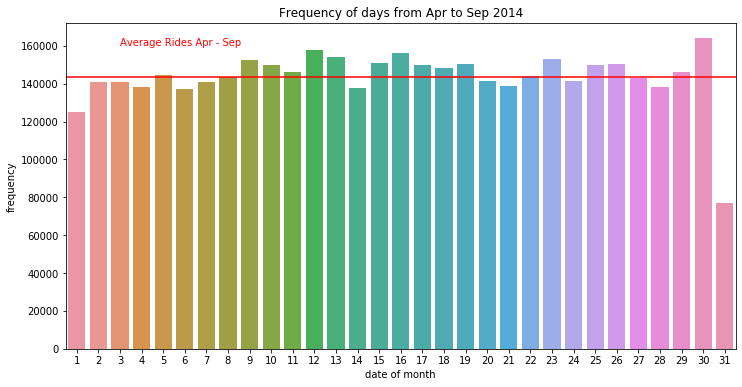

In [146]:
#using seaborn
plt.figure(figsize=(12,6))
plt.tight_layout()
sns.countplot(data=uber_data,x='day',saturation=0.75)
plt.xlabel("date of month")
plt.ylabel("frequency")
plt.axhline(uber_data.groupby('day')['day'].count().mean(),color='red')
plt.text(x=2,y=160000,s="Average Rides Apr - Sep",color='red')
plt.title("Frequency of days from Apr to Sep 2014");

#### From the graph we can see daily rides count is almost near the average count rides wrt month.

#### There are less rides in Start Date and End Date of the month.

#### Higher rides on 30th of the month compared to other months. 

In [24]:
apr_data= uber_data[uber_data['month']=='April']
aug_data= uber_data[uber_data['month']=='August']
sep_data= uber_data[uber_data['month']=='September']

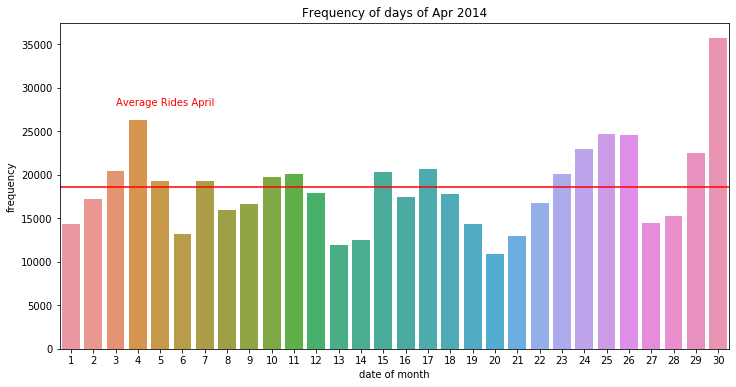

In [144]:
plt.figure(figsize=(12,6))
plt.tight_layout()
sns.countplot(data=apr_data,x='day',saturation=0.75)
plt.xlabel("date of month")
plt.ylabel("frequency")
plt.axhline(apr_data.groupby('day')['day'].count().mean(),color='red')
plt.text(x=2,y=28000,s="Average Rides April",color='red')
plt.title("Frequency of days of Apr 2014");

#### We see some similar results that we got above that on 1st of month less rides and on 30th of month rides are pretty high.

#### There are days in the middle like 6th,13th,14th,19th,20th,21st,27th,28th that have got lower rides. Their could be some reason for that on of them could be holidays.

#### 6th,13th,20th,27th are sundays.

#### We can say just the next day of a holiday, ex monday people usually travel less may be due to laziness.

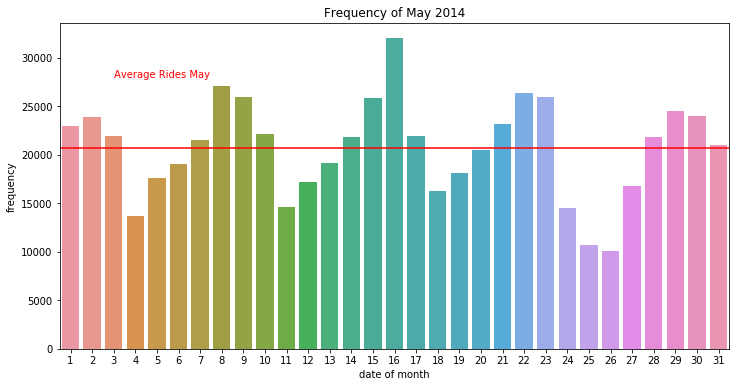

In [142]:
#histogram of days of may
may_data= uber_data[uber_data['month']=='May']
plt.figure(figsize=(12,6))
plt.tight_layout()
sns.countplot(data=may_data,x='day',saturation=0.75)
plt.xlabel("date of month")
plt.ylabel("frequency")
plt.axhline(may_data.groupby('day')['day'].count().mean(),color='red')
plt.text(x=2,y=28000,s="Average Rides May",color='red')
plt.title("Frequency of May 2014");

#### Pretty similar stuff as April's month , but on the 1st,2nd and 3rd of may we got higher rides more than average.

#### Similarly 31st also got higher rides. And 25th and 26th have gave got pretty lower rides.

#### 4th, 11th, 18th, 25th are sundays thats why recieved less rides.

#### We can predict that on the next day of holiday example Monday people prefer to travel less due to laziness.

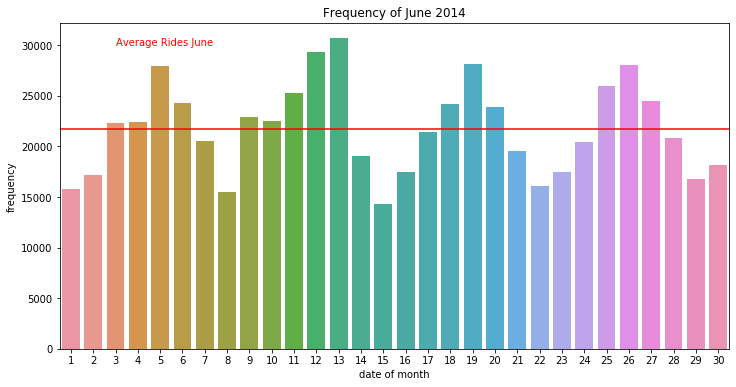

In [140]:
#histogram of days of june
june_data= uber_data[uber_data['month']=='June']
plt.figure(figsize=(12,6))
plt.tight_layout()
sns.countplot(data=june_data,x='day',saturation=0.75)
plt.xlabel("date of month")
plt.ylabel("frequency")
plt.axhline(june_data.groupby('day')['day'].count().mean(),color='red');
plt.text(x=2,y=30000,s="Average Rides June",color='red')
plt.title("Frequency of June 2014");

#### 1st,8th,15th,22nd,29th are sundays that's why less rides.

#### Silmilar prediction that on the next day of holiday example Monday people prefer to travel less due to laziness.

#### Other day have mainly higher rides nearer of above average.

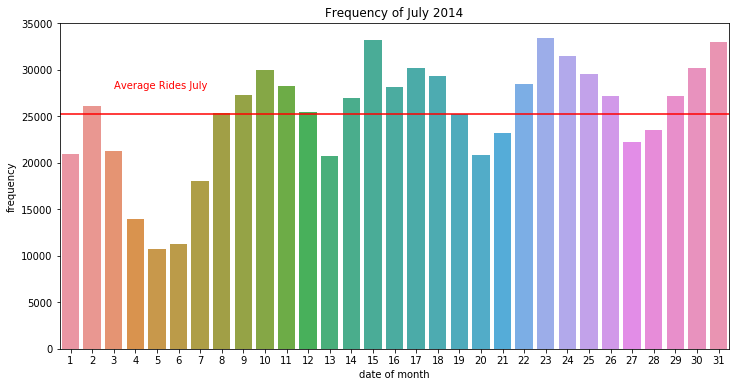

In [139]:
#histogram of days of july
july_data= uber_data[uber_data['month']=='July']
plt.figure(figsize=(12,6))
plt.tight_layout()
sns.countplot(data=july_data,x='day',saturation=0.75)
plt.xlabel("date of month")
plt.ylabel("frequency")
plt.axhline(july_data.groupby('day')['day'].count().mean(),color='red')
plt.text(x=2,y=28000,s="Average Rides July",color='red')
plt.title("Frequency of July 2014");

#### 6th, 13th, 20th, 27th are holiday thats why less rides.

#### Other predictions are same as above.

In [107]:
apr_data= uber_data[uber_data['month']=='April']
aug_data= uber_data[uber_data['month']=='August']
sep_data= uber_data[uber_data['month']=='September']

In [30]:
# daily trip count Between Apr to Sep 2014
def count_rows(row):
    return len(row)

daily_trip_counts = uber_data.groupby('day').apply(count_rows)

In [111]:
daily_trip_counts.mean()

143604.70967741936

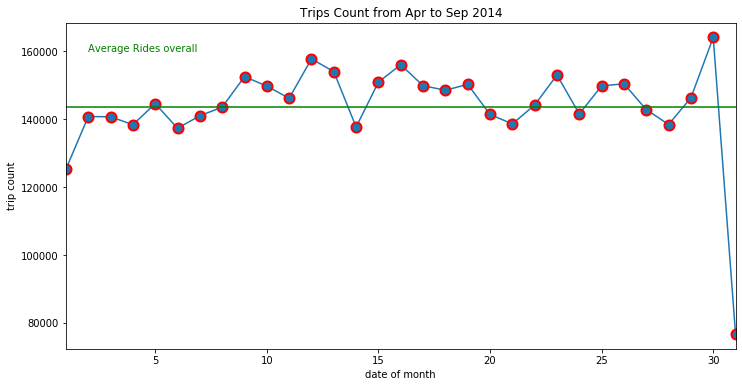

In [148]:
plt.figure(figsize=(12,6))
plt.tight_layout()
daily_trip_counts.plot(kind='line',marker='o',markersize=10,markeredgecolor='red',markeredgewidth=2)
plt.xlabel("date of month")
plt.ylabel("trip count")
plt.axhline(daily_trip_counts.mean(),color='green')
plt.text(x=2,y=160000,s="Average Rides overall",color='green')
plt.title("Trips Count from Apr to Sep 2014");

#### The result is same as we have seen in bar plot just the graph is different.

In [32]:
# daily trip count Between Apr to Sep 2014
def count_rows(row):
    return len(row)

apr_daily_trip_counts = apr_data.groupby('day').apply(count_rows)
may_daily_trip_counts = may_data.groupby('day').apply(count_rows)
june_daily_trip_counts = june_data.groupby('day').apply(count_rows)
july_daily_trip_counts = july_data.groupby('day').apply(count_rows)
aug_daily_trip_counts = aug_data.groupby('day').apply(count_rows)
sep_daily_trip_counts = sep_data.groupby('day').apply(count_rows)

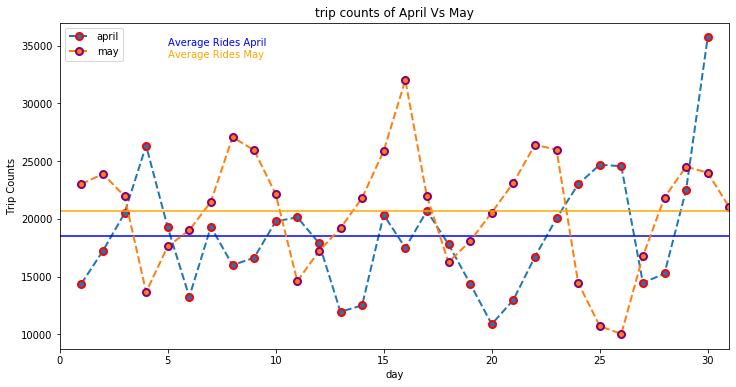

In [129]:
#compairing trip counts of April Vs May
plt.figure(figsize=(12,6))
apr_daily_trip_counts.plot(marker='o',label="april",lw=2,ls='--',markersize=7,markeredgecolor='red',markeredgewidth=2)
plt.axhline(apr_daily_trip_counts.mean(),color='blue')
may_daily_trip_counts.plot(marker='o',label="may",lw=2,ls='--',markersize=7,markeredgecolor='purple',markeredgewidth=2)
plt.axhline(may_daily_trip_counts.mean(),color='orange')
plt.text(x=5,y=35000,s="Average Rides April",color='blue')
plt.text(x=5,y=34000,s="Average Rides May",color='orange')
plt.legend()
plt.ylabel('Trip Counts')
plt.title('trip counts of April Vs May');

#### We can see There is high up and downs in April and have increased exponentially on 30th of month. Thus have an average of around 19000.

#### We can see There is low up and downs in May and have their highest ride on 16th of month. Thus have an average of around 21000.

Text(0.5, 1.0, 'trip counts of June Vs July')

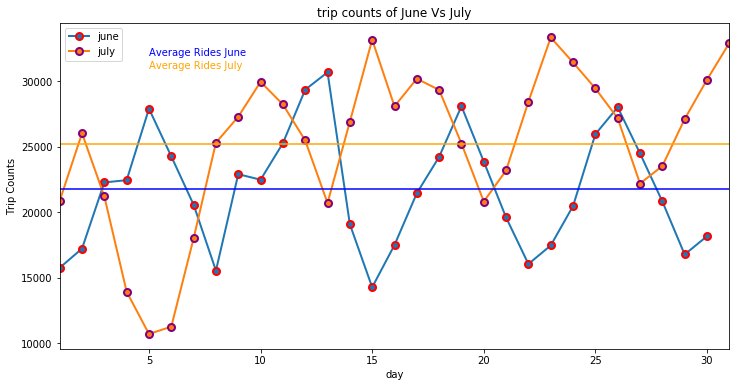

In [152]:
#compairing trip counts of June Vs July
plt.figure(figsize=(12,6))
june_daily_trip_counts.plot(marker='o',label="june",lw=2,markersize=7,markeredgecolor='red',markeredgewidth=2)
july_daily_trip_counts.plot(marker='o',label="july",lw=2,markersize=7,markeredgecolor='purple',markeredgewidth=2)

plt.axhline(june_daily_trip_counts.mean(),color='blue')
plt.axhline(july_daily_trip_counts.mean(),color='orange')

plt.text(x=5,y=32000,s="Average Rides June",color='blue')
plt.text(x=5,y=31000,s="Average Rides July",color='orange')
plt.legend()
plt.ylabel('Trip Counts')
plt.title('trip counts of June Vs July')

#### June has prettly high rises and falls and have their highest rides on 13th thus have average rides around 22000.

#### July had got exponetially less rides from 4-6th but after that they have pretty high rides and have grown quite good thus have average rides slightly above 25000.  

Text(0.5, 1.0, 'trip counts of Aug vs Sept')

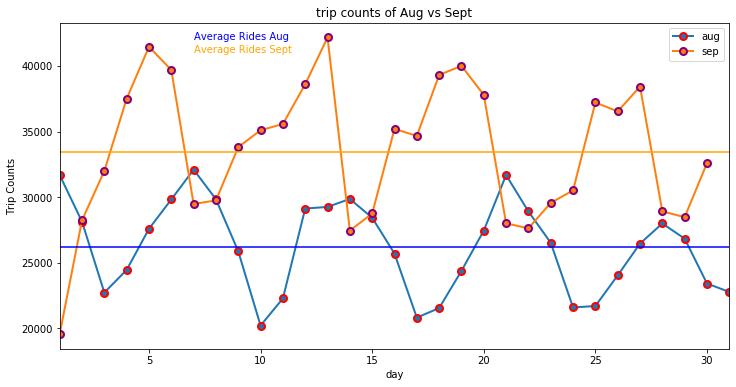

In [153]:
#compairing trip counts of Aug vs Sept
plt.figure(figsize=(12,6))
aug_daily_trip_counts.plot(marker='o',label="aug",lw=2,markersize=7,markeredgecolor='red',markeredgewidth=2)
sep_daily_trip_counts.plot(marker='o',label="sep",lw=2,markersize=7,markeredgecolor='purple',markeredgewidth=2)

plt.axhline(aug_daily_trip_counts.mean(),color='blue')
plt.axhline(sep_daily_trip_counts.mean(),color='orange')

plt.text(x=7,y=42000,s="Average Rides Aug",color='blue')
plt.text(x=7,y=41000,s="Average Rides Sept",color='orange')

plt.legend()
plt.ylabel('Trip Counts')
plt.title('trip counts of Aug vs Sept')

#### Augest have the same ups and downs and have their highest rides on 7th and 22nd , thus have average rides of around 26000.
#### Sept have the higher ups than downs and have their highest rides on 5th and 12th , and have grown quite fast thus have average rides of around 34000.

### After comparing month wise , we can say that every month the users of Uber have increased pretty good, so they are performing nice in the market.

Text(0.5, 1.0, 'trip counts of Apr Vs Sept')

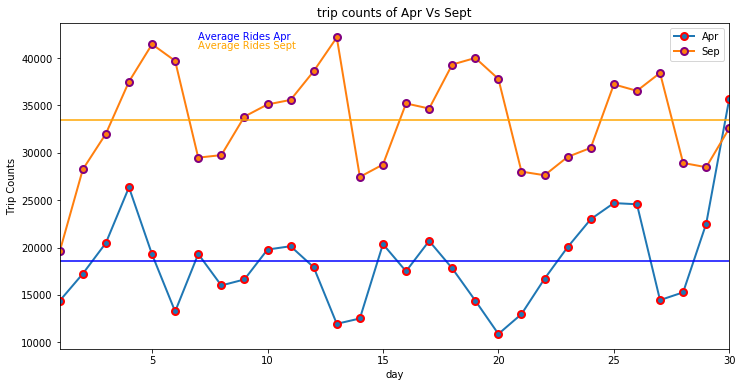

In [154]:
#compairing trip counts of Apr Vs Sept
plt.figure(figsize=(12,6))
apr_daily_trip_counts.plot(marker='o',label="Apr",lw=2,markersize=7,markeredgecolor='red',markeredgewidth=2)
sep_daily_trip_counts.plot(marker='o',label="Sep",lw=2,markersize=7,markeredgecolor='purple',markeredgewidth=2)

plt.axhline(apr_daily_trip_counts.mean(),color='blue')
plt.axhline(sep_daily_trip_counts.mean(),color='orange')

plt.text(x=7,y=42000,s="Average Rides Apr",color='blue')
plt.text(x=7,y=41000,s="Average Rides Sept",color='orange')

plt.legend()
plt.ylabel('Trip Counts')
plt.title('trip counts of Apr Vs Sept')

### This the graph showing initial month and final month of the dataset we can see that the average users have increased from 19000 to 34000 which is almost double within 6 months which is a very nice start for Uber.

In [37]:
#Plotting the trips by the hours in a day
def hours_rows(row):
    return len(row)

hours_data = uber_data.groupby('hour').apply(hours_rows)

Text(0.5, 1.0, 'Trips by Hourly Count from Apr to Sep 2014')

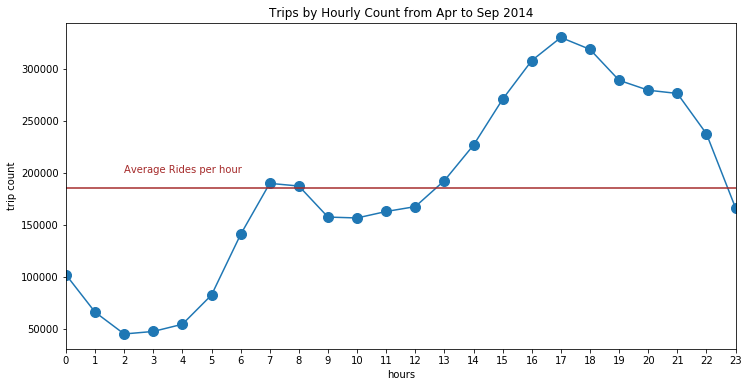

In [162]:
plt.figure(figsize=(12,6))
plt.tight_layout()
hours_data.plot(kind='line',marker='o',markersize=10)
plt.xticks(range(0,24))

plt.axhline(hours_data.mean(),color='brown')
plt.text(x=2,y=200000,s="Average Rides per hour",color='brown')

plt.xlabel("hours")
plt.ylabel("trip count")
plt.title("Trips by Hourly Count from Apr to Sep 2014")

#### We can see there are pretty less rides in midnight between 12am - 5 am as it is usually time of sleep of a comman person.

#### From 5pm till 1pm rides are near the average rides as it is the office time of people.

#### After 1pm the rides grows exponentially till 5-6pm as it time of leaving office and could be many other reasons.

#### After 6pm rides falls but are stays abover average till 11pm.

In [39]:
#Plotting the trips by the hours in a day in april
def hours_rows(row):
    return len(row)

apr_hours_data = apr_data.groupby('hour').apply(hours_rows)

Text(0.5, 1.0, 'Trips Count by Hours in Apr 2014')

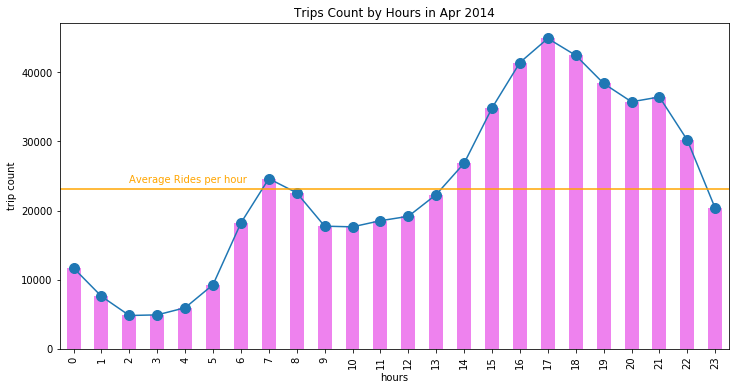

In [163]:
plt.figure(figsize=(12,6))
plt.tight_layout()

apr_hours_data.plot(kind='line',markersize=10,marker='o')
apr_hours_data.plot(kind='bar',color='violet')

plt.axhline(apr_hours_data.mean(),color='orange')
plt.text(x=2,y=24000,s="Average Rides per hour",color='orange')

plt.xticks(range(0,24))
plt.xlabel("hours")
plt.ylabel("trip count")
plt.title("Trips Count by Hours in Apr 2014")

#### April month shows almost trend as the overall trend which we saw above.

In [41]:
def hours_rows(row):
    return len(row)

sept_hours_data = sep_data.groupby('hour').apply(hours_rows)

Text(0.5, 1.0, 'Trips Count by Hours Sept 2014')

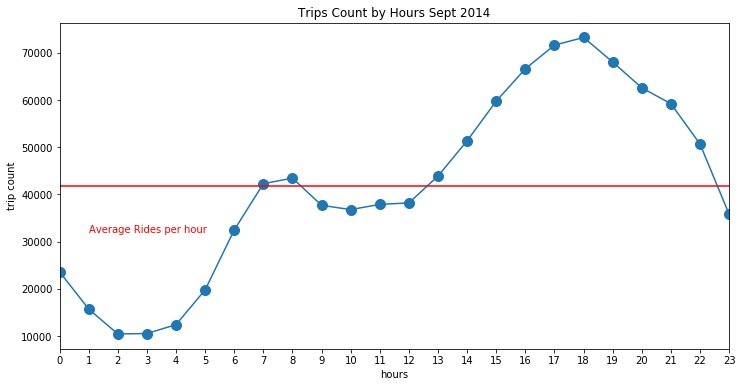

In [166]:
plt.figure(figsize=(12,6))
plt.tight_layout()
sept_hours_data.plot(kind='line',marker='o',markersize=10)

plt.axhline(sept_hours_data.mean(),color='red')
plt.text(x=1,y=32000,s="Average Rides per hour",color='red')

plt.xticks(range(0,24))
plt.xlabel("hours")
plt.ylabel("trip count")
plt.title("Trips Count by Hours Sept 2014")

#### This shows pretty different trend compared to average trend of all months.

#### From 12am- 5am rides are low as its mid-night.

#### But after that till 11am the rides and high and have grown exponentially between 12pm-7pm.

#### This is all because of almost double the users had started using Uber in September compared to when started in April

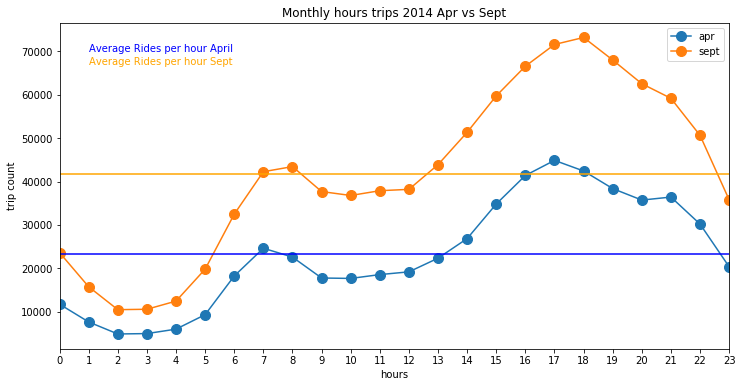

In [171]:
plt.figure(figsize=(12,6))
plt.tight_layout()
apr_hours_data.plot(kind='line',marker='o',markersize=10,label='apr')
sept_hours_data.plot(kind='line',marker='o',markersize=10,label='sept')

plt.axhline(apr_hours_data.mean(),color='blue')
plt.text(x=1,y=70000,s="Average Rides per hour April",color='blue')
plt.axhline(sept_hours_data.mean(),color='orange')
plt.text(x=1,y=67000,s="Average Rides per hour Sept",color='orange')


plt.xticks(range(0,24))
plt.xlabel("hours")
plt.ylabel("trip count")
plt.title("Monthly hours trips 2014 Apr vs Sept")
plt.legend();

#### The trend is same but the average rides have incresed marginally a lot from April to May.

#### We can see the highest ride count in april month i,e 5pm is almost the average Rides count of Sept which is awesome. 

#### This is all because of almost double the users had started using Uber in September compared to when started in April

In [43]:
def hours_rows(row):
    return len(row)

may_hours_data = may_data.groupby('hour').apply(hours_rows)
june_hours_data = june_data.groupby('hour').apply(hours_rows)
july_hours_data = july_data.groupby('hour').apply(hours_rows)
aug_hours_data = july_data.groupby('hour').apply(hours_rows)

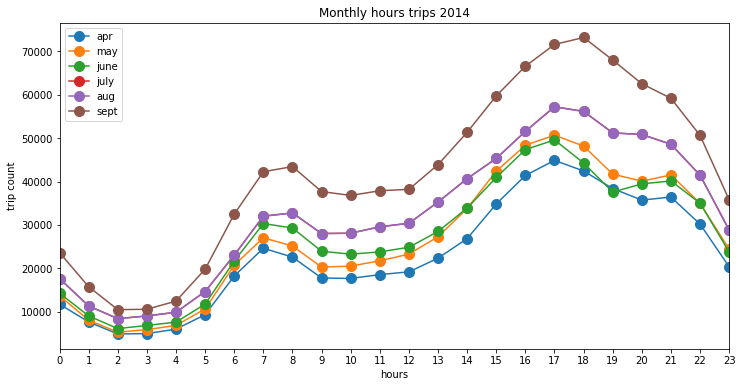

In [172]:
plt.figure(figsize=(12,6))
plt.tight_layout()
apr_hours_data.plot(kind='line',marker='o',markersize=10,label='apr')
may_hours_data.plot(kind='line',marker='o',markersize=10,label='may')
june_hours_data.plot(kind='line',marker='o',markersize=10,label='june')
july_hours_data.plot(kind='line',marker='o',markersize=10,label='july')
aug_hours_data.plot(kind='line',marker='o',markersize=10,label='aug')
sept_hours_data.plot(kind='line',marker='o',markersize=10,label='sept')

plt.xticks(range(0,24))
plt.xlabel("hours")
plt.ylabel("trip count")
plt.title("Monthly hours trips 2014")
plt.legend();

#### This shows the trend between Apr- Sept , the curve is pretty same but the users have increased a lot.

In [185]:
#Analysis of month
month_count = uber_data['month'].value_counts()
month_count

September    1004099
August        813393
July          781969
June          653158
May           642360
April         556767
Name: month, dtype: int64

In [182]:
month_count = pd.DataFrame(month_count)

In [183]:
month_count.rename(columns={'month':'total_counts'})

,total_counts
September,1004099
August,813393
July,781969
June,653158
May,642360
April,556767


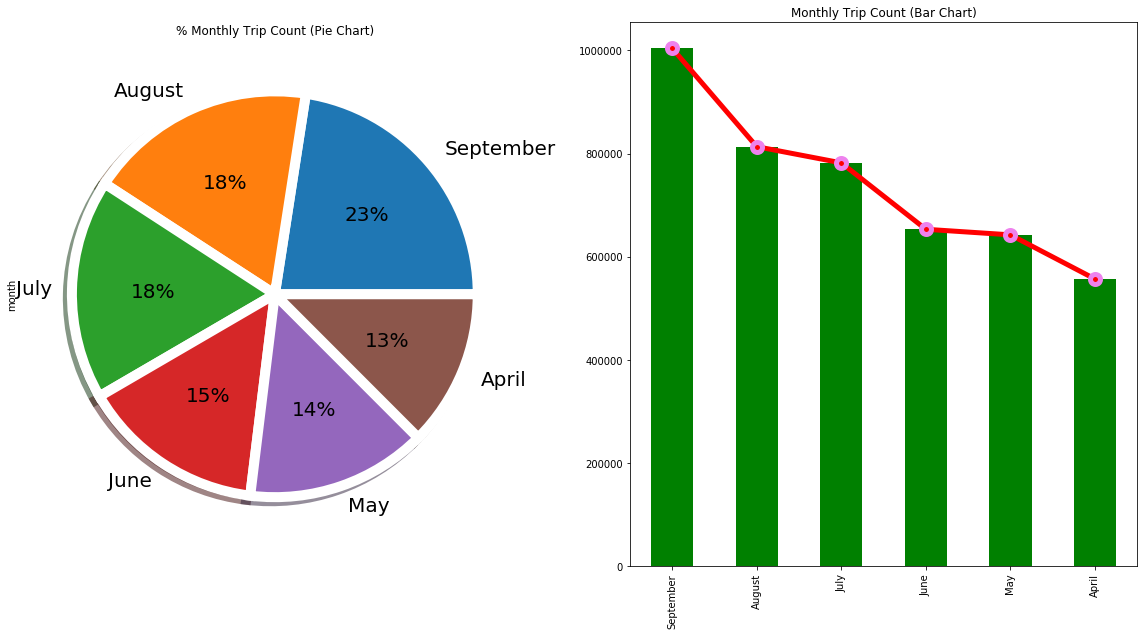

In [186]:
plt.figure(figsize=(20,10))
plt.subplot(121)
month_count.plot.pie(autopct='%1.f%%',wedgeprops={'linewidth':10,'edgecolor':'white'},shadow=True,fontsize=20)
plt.title("% Monthly Trip Count (Pie Chart)")

plt.subplot(122)
month_count.plot(marker='o',markersize=10,linewidth=5,color='red',markeredgecolor='violet',markeredgewidth=5)
month_count.plot(kind='bar',color='green');
plt.title("Monthly Trip Count (Bar Chart)");

#### This shows the monthly increase in trip count and 23% rides are of monthSeptember.

In [49]:
#Analysis by weekday
day_count = uber_data.groupby('dayName')['dayName'].count().sort_values(ascending=False)
day_count

dayName
Thursday     741372
Friday       727532
Wednesday    683604
Tuesday      651753
Saturday     634194
Monday       532133
Sunday       481158
Name: dayName, dtype: int64

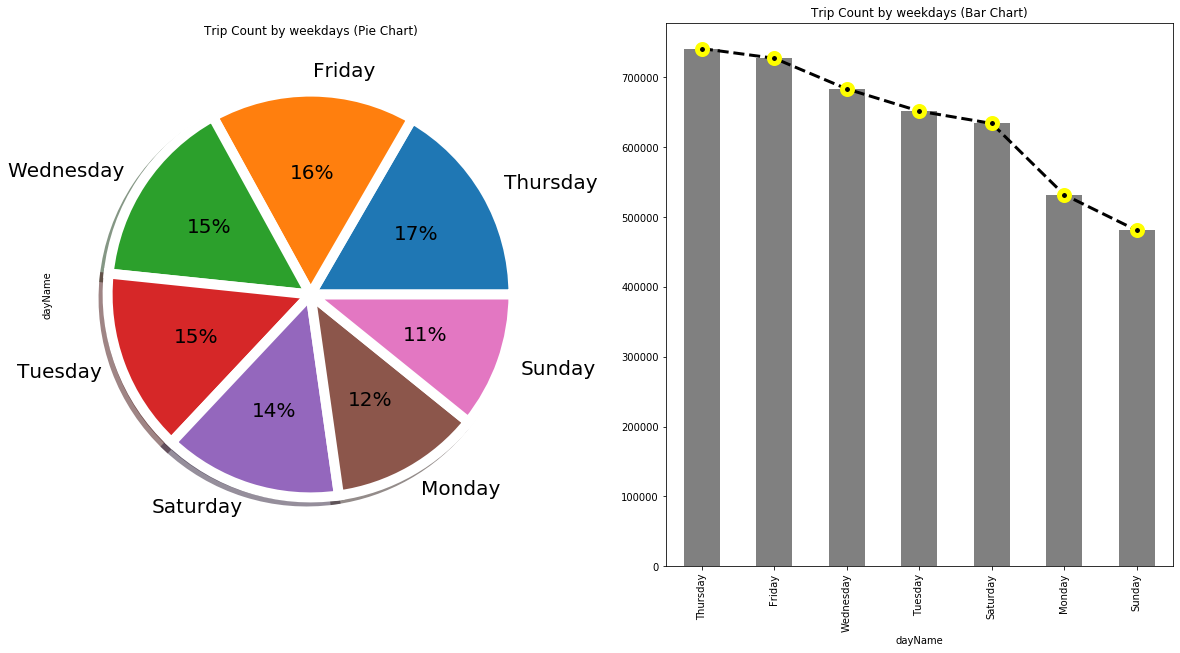

In [187]:
plt.figure(figsize=(20,10))
plt.subplot(121)
uber_data.groupby('dayName')['dayName'].count().sort_values(ascending=False).plot.pie(autopct='%1.f%%',
                                                             wedgeprops={'linewidth':10,'edgecolor':'white'},
                                                             shadow=True,
                                                             fontsize=20)
plt.title("Trip Count by weekdays (Pie Chart)")

plt.subplot(122)
uber_data.groupby('dayName')['dayName'].count().sort_values(ascending=False).plot(marker='o',ls='--',markersize=10,linewidth=3,color='black',markeredgecolor='yellow',markeredgewidth=5)
uber_data.groupby('dayName')['dayName'].count().sort_values(ascending=False).plot(kind='bar',color='grey');
plt.title("Trip Count by weekdays (Bar Chart)");

#### Weekdays trip count shows Thusday and Friday have the highest rides.

#### Sunday and monday have the lowest rides and the reason we saw in the bar plots of months.

#### Other days have moderate rides 

In [51]:
# day count of april
def count_days(row):
    return len(row)

apr_weekly_trip_counts = apr_data.groupby('dayName').apply(count_rows)
may_weekly_trip_counts = may_data.groupby('dayName').apply(count_rows)
june_weekly_trip_counts = june_data.groupby('dayName').apply(count_rows)
july_weekly_trip_counts = july_data.groupby('dayName').apply(count_rows)
aug_weekly_trip_counts = aug_data.groupby('dayName').apply(count_rows)
sep_weekly_trip_counts = sep_data.groupby('dayName').apply(count_rows)

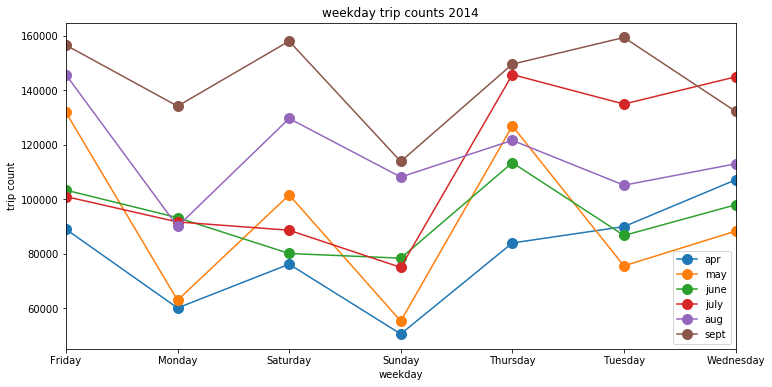

In [188]:
plt.figure(figsize=(12,6))
plt.tight_layout()
apr_weekly_trip_counts.plot(kind='line',marker='o',markersize=10,label='apr')
may_weekly_trip_counts.plot(kind='line',marker='o',markersize=10,label='may')
june_weekly_trip_counts.plot(kind='line',marker='o',markersize=10,label='june')
july_weekly_trip_counts.plot(kind='line',marker='o',markersize=10,label='july')
aug_weekly_trip_counts.plot(kind='line',marker='o',markersize=10,label='aug')
sep_weekly_trip_counts.plot(kind='line',marker='o',markersize=10,label='sept')

plt.xlabel("weekday")
plt.ylabel("trip count")
plt.title("weekday trip counts 2014")
plt.legend();

#### We can see the rides graph weekday wise 

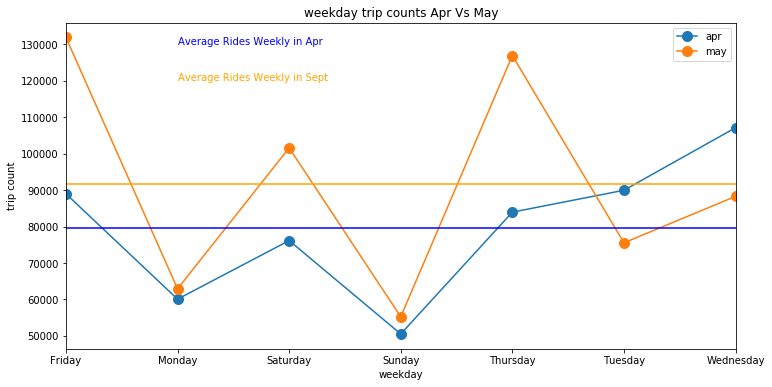

In [193]:
plt.figure(figsize=(12,6))
plt.tight_layout()
apr_weekly_trip_counts.plot(kind='line',marker='o',markersize=10,label='apr')
may_weekly_trip_counts.plot(kind='line',marker='o',markersize=10,label='may')

plt.axhline(apr_weekly_trip_counts.mean(),color='blue')
plt.text(x=1,y=130000,s="Average Rides Weekly in Apr",color='blue')
plt.axhline(may_weekly_trip_counts.mean(),color='orange')
plt.text(x=1,y=120000,s="Average Rides Weekly in Sept",color='orange')

plt.xlabel("weekday")
plt.ylabel("trip count")
plt.title("weekday trip counts Apr Vs May")
plt.legend();

#### We can see the increase in number of users in may compared to Apr but on Thusday and Wednusday their is fall in trips compard to April.

#### Average increase is also from 79500 to 92000 i.e around 12000 users within 1 month that good start.

In [215]:
143400 - 79500

63900

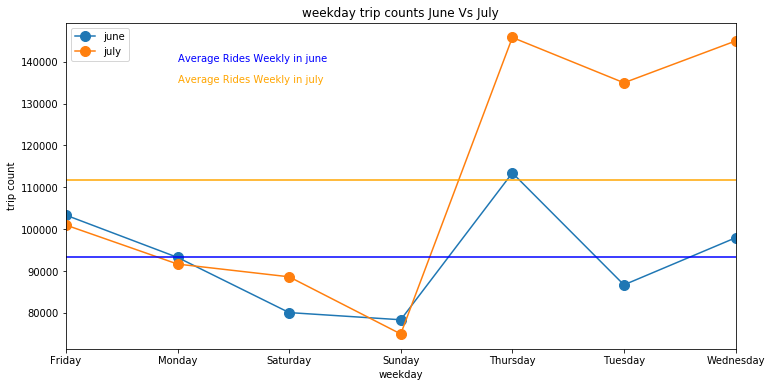

In [195]:
plt.figure(figsize=(12,6))
plt.tight_layout()
june_weekly_trip_counts.plot(kind='line',marker='o',markersize=10,label='june')
july_weekly_trip_counts.plot(kind='line',marker='o',markersize=10,label='july')

plt.axhline(june_weekly_trip_counts.mean(),color='blue')
plt.text(x=1,y=140000,s="Average Rides Weekly in june",color='blue')
plt.axhline(july_weekly_trip_counts.mean(),color='orange')
plt.text(x=1,y=135000,s="Average Rides Weekly in july",color='orange')

plt.xlabel("weekday")
plt.ylabel("trip count")
plt.title("weekday trip counts June Vs July")
plt.legend();

#### Friday Monday Sunday have pretty much the same amount of users travelling in June and july but Thusday,Tuesday and Wednusday we see exponential growth in july compared to june.

#### Average increase is also from 93000 to 112000 i.e around 20000 users between june-july that good.

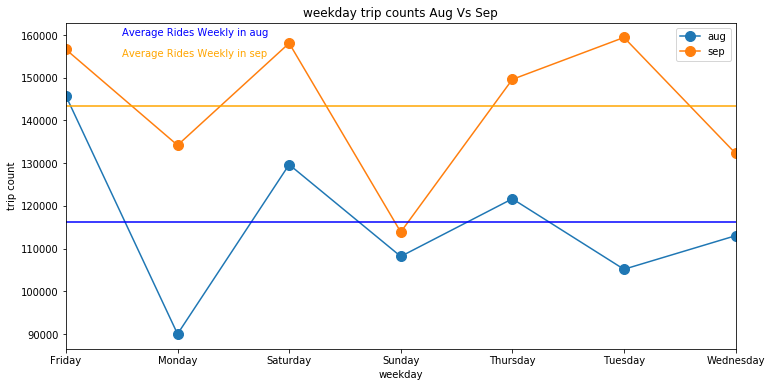

In [208]:
plt.figure(figsize=(12,6))
plt.tight_layout()
aug_weekly_trip_counts.plot(kind='line',marker='o',markersize=10,label='aug')
sep_weekly_trip_counts.plot(kind='line',marker='o',markersize=10,label='sep')

plt.axhline(aug_weekly_trip_counts.mean(),color='blue')
plt.text(x=0.5,y=160000,s="Average Rides Weekly in aug",color='blue')
plt.axhline(sep_weekly_trip_counts.mean(),color='orange')
plt.text(x=0.5,y=155000,s="Average Rides Weekly in sep",color='orange')

plt.xlabel("weekday")
plt.ylabel("trip count")
plt.title("weekday trip counts Aug Vs Sep")
plt.legend();

#### Sept have pretty much high rides in all the days compared to Aug. 

#### Average increase is also from 116200 to 143400 i.e around 27200 users between aug-Sep that awesome.

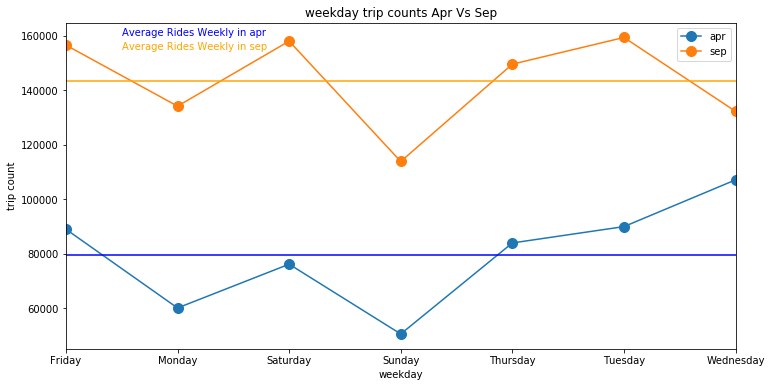

In [213]:
plt.figure(figsize=(12,6))
plt.tight_layout()
apr_weekly_trip_counts.plot(kind='line',marker='o',markersize=10,label='apr')
sep_weekly_trip_counts.plot(kind='line',marker='o',markersize=10,label='sep')

plt.axhline(apr_weekly_trip_counts.mean(),color='blue')
plt.text(x=0.5,y=160000,s="Average Rides Weekly in apr",color='blue')
plt.axhline(sep_weekly_trip_counts.mean(),color='orange')
plt.text(x=0.5,y=155000,s="Average Rides Weekly in sep",color='orange')

plt.xlabel("weekday")
plt.ylabel("trip count")
plt.title("weekday trip counts Apr Vs Sep")
plt.legend()
#plt.ticks(range(0,6),'Sun Mon Tue Wed Thus Fri Sat'.split())

#### This is the actual difference what we get from Apr to Sept

#### Average increase is also from 79500 to 143400 i.e around 64000 users within 6 months that an excellent performance.

In [57]:
uber_data.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'day', 'month', 'dayName', 'quarter',
       'week', 'hour', 'minute', 'date'],
      dtype='object')

In [58]:
# analysis by quarter
quarter_count = uber_data.groupby('quarter')['quarter'].count()
quarter_count

quarter
2    1852285
3    2599461
Name: quarter, dtype: int64

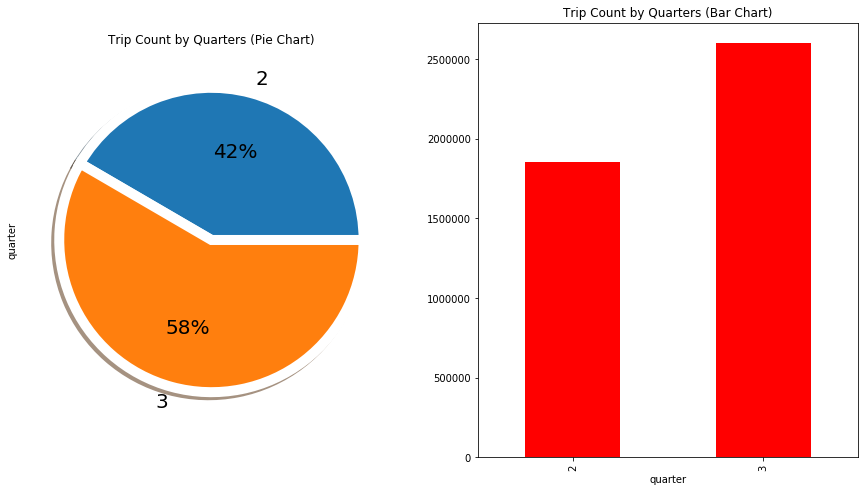

In [216]:
plt.figure(figsize=(15,8))
plt.subplot(121)
uber_data.groupby('quarter')['quarter'].count().plot.pie(autopct='%1.f%%',
                                                             wedgeprops={'linewidth':10,'edgecolor':'white'},
                                                             shadow=True,
                                                             fontsize=20)
plt.title("Trip Count by Quarters (Pie Chart)")

plt.subplot(122)
uber_data.groupby('quarter')['quarter'].count().plot(kind='bar',color='red');
plt.title("Trip Count by Quarters (Bar Chart)");

#### 3rd quarter has gained around 60% more users compared to 2nd quarter.

In [217]:
#analysis by week
def count_days(row):
    return len(row)

week_count = uber_data.groupby('week').apply(count_rows)

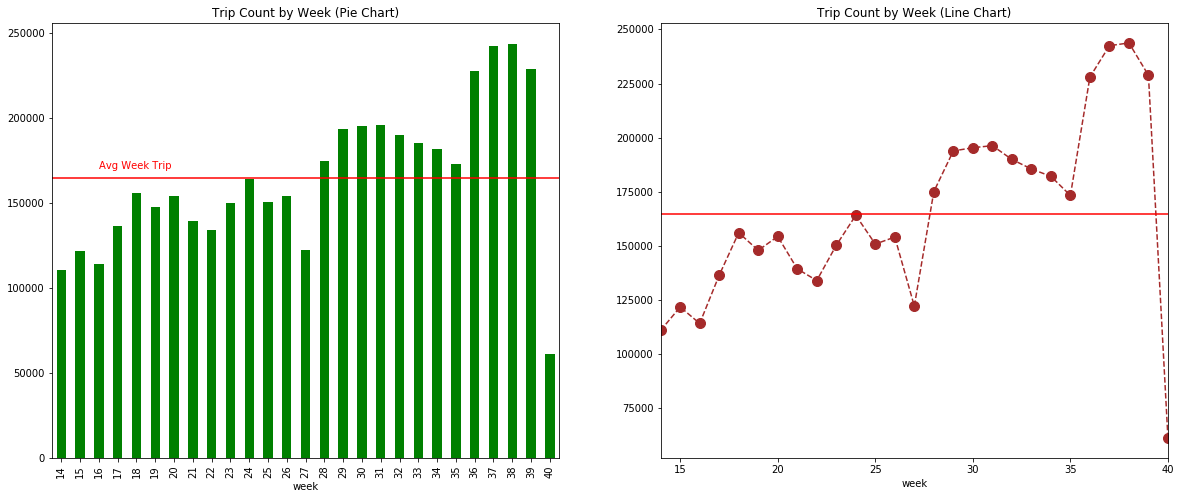

In [228]:
plt.figure(figsize=(20,8))
plt.subplot(121)
week_count.plot(kind='bar',color='green')
plt.axhline(week_count.mean(),color='red')
plt.text(x=2,y=170000,s="Avg Week Trip",color='red')

plt.title("Trip Count by Week (Pie Chart)")

plt.subplot(122)
week_count.plot(marker='o',ls='--',markersize=10,color='brown');
plt.axhline(week_count.mean(),color='red')
plt.title("Trip Count by Week (Line Chart)");

#### We can see Intial Week in month of April have less rides compared to average, but after 27th week the rides have grown pretty well and have high Weekly trip counts.

In [229]:
def avg_trips_per_month(row):
    return len(row)

avg_trip_counts = uber_data.groupby(['month']).apply(avg_trips_per_month)

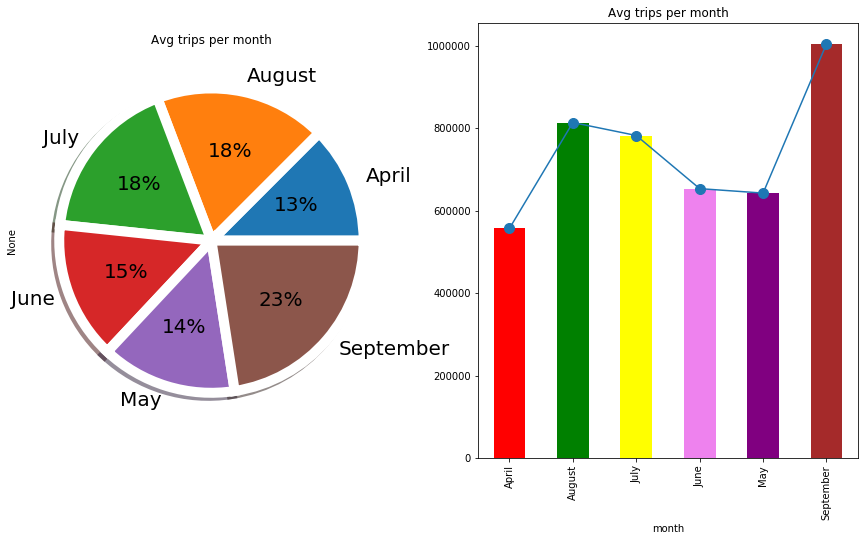

In [230]:
plt.figure(figsize=(15,8))
plt.subplot(121)
avg_trip_counts.plot.pie(autopct='%1.f%%',
                                                             wedgeprops={'linewidth':10,'edgecolor':'white'},
                                                             shadow=True,
                                                             fontsize=20)

plt.title('Avg trips per month')
plt.subplot(122)
avg_trip_counts.plot(marker='o',markersize=10)
avg_trip_counts.plot(kind='bar',color=['red','green','yellow','violet','purple','brown']);
plt.title('Avg trips per month');

#### Here we can see the average trip count per month . Count has grown from Apr to Sept.

In [231]:
# creating 4 bins for dividing minutes

bins = [0,15,30,45,60]
labels =["0-15 min","15-30 min","30-45 min","45-60 min"]
uber_data['minsCategory'] = pd.cut(uber_data['minute'],bins=bins, labels=labels)

In [232]:
# replace all the Na values
uber_data['minsCategory'] = uber_data['minsCategory'].fillna("0-15 min")

In [233]:
#analysis by mins
def count_mins(row):
    return len(row)

min_count = uber_data.groupby('minsCategory').apply(count_rows)
min_count

minsCategory
0-15 min     1200970
15-30 min    1110109
30-45 min    1111880
45-60 min    1028787
dtype: int64

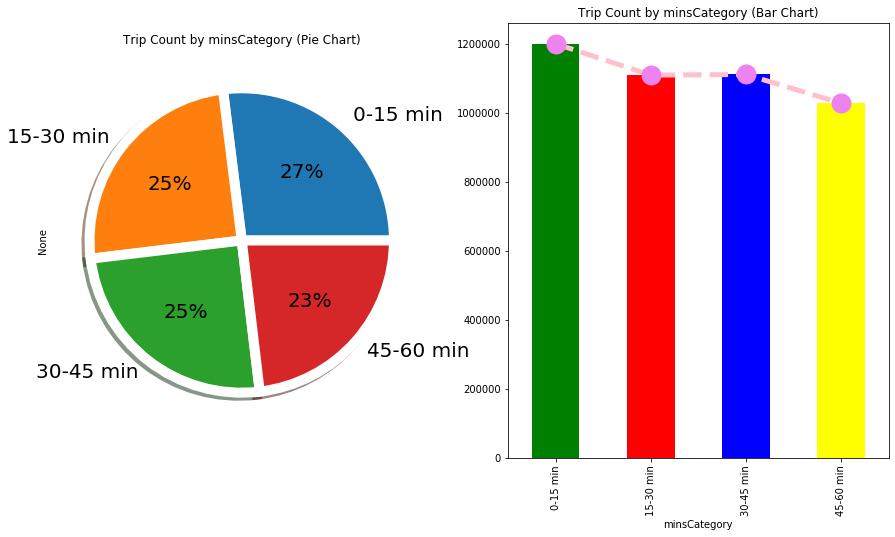

In [234]:
plt.figure(figsize=(15,8))
plt.subplot(121)
min_count.plot.pie(autopct='%1.f%%',
                                                             wedgeprops={'linewidth':10,'edgecolor':'white'},
                                                             shadow=True,
                                                             fontsize=20)
plt.title("Trip Count by minsCategory (Pie Chart)")

plt.subplot(122)
min_count.plot(color='pink',linewidth=5,marker='o',ls='--',markersize=10,markeredgecolor='violet',markeredgewidth=10);
min_count.plot(kind='bar',color=['green','red','blue','yellow']);

plt.title("Trip Count by minsCategory (Bar Chart)");

#### We can see Most of the people have booked their cabs in the initial 15 mins of each hour.

#### Rest have almost same counts.

Text(0.5, 1.0, 'Trip Count by minsCategory (Line Chart)')

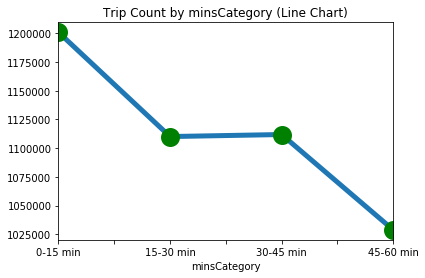

In [235]:
min_count.plot(kind='line',marker='o',label="june",lw=5,markersize=9,markeredgecolor='green',markeredgewidth=10)
plt.title("Trip Count by minsCategory (Line Chart)")

In [69]:
#uber_data.drop('minsCategory',axis=1,inplace=True)

In [236]:
#Cross Analysis

def month_hour_count(row):
    return len(row)

month_hour = uber_data.groupby(['month','hour']).apply(month_hour_count).unstack()

In [237]:
month_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
April,11716,7620,4849,4938,5965,9302,18224,24624,22577,17758,...,26851,34835,41408,44888,42439,38380,35729,36427,30189,20335
August,21034,14201,9876,10163,11580,16241,24466,33460,33941,29651,...,39927,47352,52472,55961,54272,51905,50602,50276,45098,32971
July,17618,11307,8379,9009,9862,14641,23039,32009,32770,28013,...,40678,45340,51573,57251,56179,51224,50858,48605,41479,28810
June,14252,9008,6082,6825,7576,11755,21664,30317,29292,23932,...,33887,40941,47377,49609,44274,37581,39468,40148,35019,23774
May,13649,8040,5257,5847,6830,10612,20722,27043,25133,20266,...,33799,42400,48375,50699,48185,41713,40088,41527,34990,24408
September,23607,15737,10455,10549,12433,19799,32484,42272,43453,37696,...,51371,59768,66605,71616,73235,68033,62564,59200,50649,35779


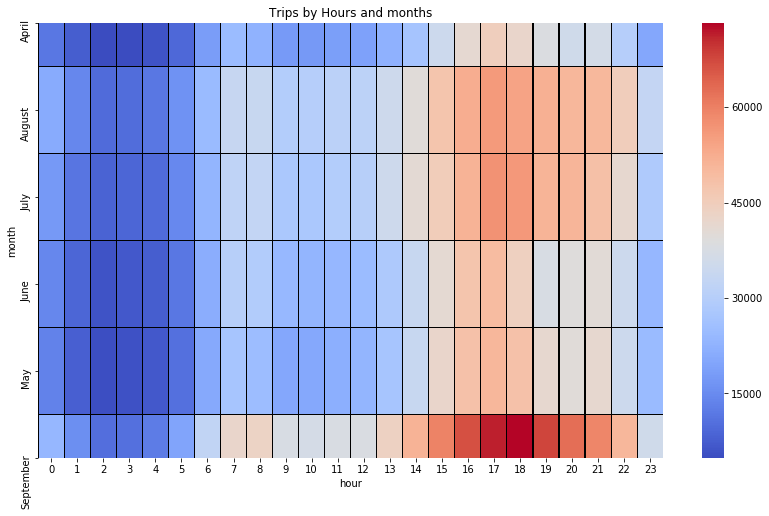

In [238]:
plt.figure(figsize=(14,8))
plt.tight_layout()
plt.yticks(range(6),'April May June July Aug Sept'.split())
sns.heatmap(month_hour,linewidths=0.1,linecolor='black',cmap='coolwarm')
plt.title('Trips by Hours and months');

#### We can see that mostly in every month between 3pm to 9pm most of the people have booked their trips.

Text(1.0, 1, 'Trips by Hours and months')

<Figure size 1008x576 with 0 Axes>

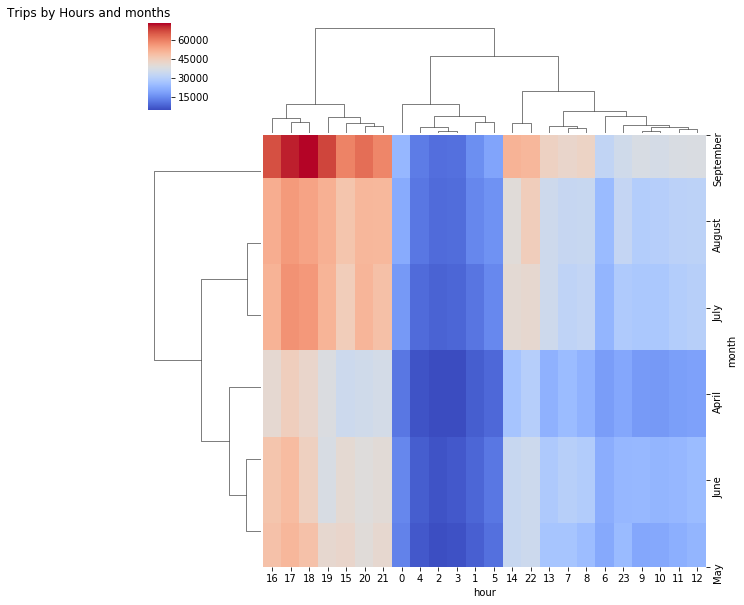

In [239]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.clustermap(month_hour,cmap='coolwarm')
plt.title('Trips by Hours and months',loc='right')

In [240]:
#Cross Analysis

def day_month_count(row):
    return len(row)

day_month = uber_data.groupby(['month','day']).apply(day_month_count).unstack()
day_month

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
April,14376.0,17230.0,20482.0,26353.0,19273.0,13248.0,19319.0,15996.0,16631.0,19785.0,...,16710.0,20047.0,22992.0,24691.0,24565.0,14452.0,15270.0,22516.0,35718.0,NaN
August,31686.0,28135.0,22736.0,24458.0,27592.0,29828.0,32102.0,29844.0,25876.0,20222.0,...,28912.0,26528.0,21602.0,21710.0,24045.0,26468.0,27999.0,26843.0,23426.0,22782.0
July,20875.0,26040.0,21208.0,13921.0,10693.0,11253.0,18014.0,25320.0,27308.0,29974.0,...,28456.0,33367.0,31455.0,29469.0,27189.0,22196.0,23539.0,27126.0,30134.0,32941.0
June,15755.0,17222.0,22282.0,22454.0,27918.0,24271.0,20574.0,15536.0,22912.0,22490.0,...,16043.0,17462.0,20478.0,25973.0,28035.0,24502.0,20829.0,16771.0,18169.0,NaN
May,23009.0,23901.0,21973.0,13668.0,17614.0,19018.0,21488.0,27081.0,25954.0,22144.0,...,26411.0,26005.0,14482.0,10722.0,10031.0,16773.0,21852.0,24533.0,24000.0,21014.0
September,19581.0,28239.0,32007.0,37507.0,41457.0,39695.0,29486.0,29753.0,33819.0,35100.0,...,27628.0,29567.0,30519.0,37218.0,36538.0,38424.0,28924.0,28478.0,32593.0,NaN


In [241]:
#replacing Nan with mean value of days
day_month.loc['April'][31] = round(day_month.loc['April'].mean(),1)
day_month.loc['June'][31] = round(day_month.loc['June'].mean(),1)
day_month.loc['September'][31] = round(day_month.loc['September'].mean(),1)

In [242]:
day_month

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
April,14376.0,17230.0,20482.0,26353.0,19273.0,13248.0,19319.0,15996.0,16631.0,19785.0,...,16710.0,20047.0,22992.0,24691.0,24565.0,14452.0,15270.0,22516.0,35718.0,18558.9
August,31686.0,28135.0,22736.0,24458.0,27592.0,29828.0,32102.0,29844.0,25876.0,20222.0,...,28912.0,26528.0,21602.0,21710.0,24045.0,26468.0,27999.0,26843.0,23426.0,22782.0
July,20875.0,26040.0,21208.0,13921.0,10693.0,11253.0,18014.0,25320.0,27308.0,29974.0,...,28456.0,33367.0,31455.0,29469.0,27189.0,22196.0,23539.0,27126.0,30134.0,32941.0
June,15755.0,17222.0,22282.0,22454.0,27918.0,24271.0,20574.0,15536.0,22912.0,22490.0,...,16043.0,17462.0,20478.0,25973.0,28035.0,24502.0,20829.0,16771.0,18169.0,21771.9
May,23009.0,23901.0,21973.0,13668.0,17614.0,19018.0,21488.0,27081.0,25954.0,22144.0,...,26411.0,26005.0,14482.0,10722.0,10031.0,16773.0,21852.0,24533.0,24000.0,21014.0
September,19581.0,28239.0,32007.0,37507.0,41457.0,39695.0,29486.0,29753.0,33819.0,35100.0,...,27628.0,29567.0,30519.0,37218.0,36538.0,38424.0,28924.0,28478.0,32593.0,33470.0


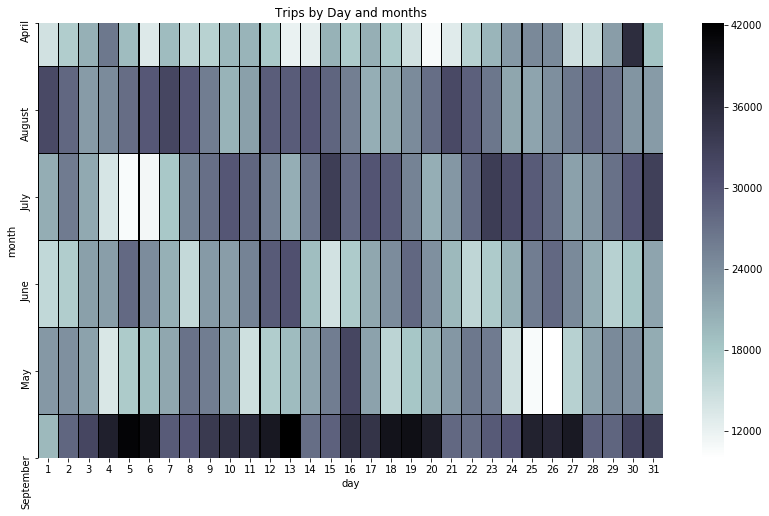

In [243]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.heatmap(day_month,linewidths=0.1,linecolor='black',cmap='bone_r')
plt.title("Trips by Day and months");

Text(1.0, 1, 'Trips by Day and months')

<Figure size 1008x576 with 0 Axes>

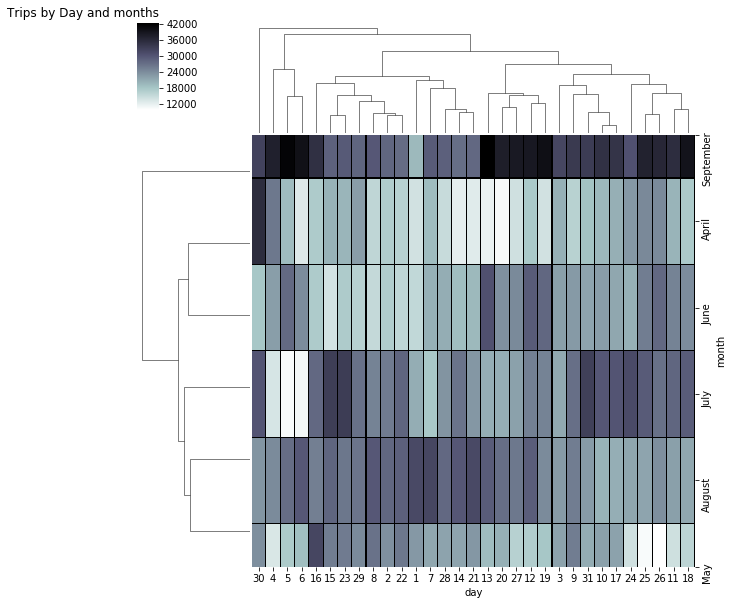

In [244]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.clustermap(day_month,linewidths=0.1,linecolor='black',cmap='bone_r')
plt.title("Trips by Day and months",loc='right')

In [245]:
#Cross Analysis

def month_dayName_count(row):
    return len(row)

month_dayName = uber_data.groupby(['month','dayName']).apply(month_dayName_count).unstack()
month_dayName

dayName,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,88985,60075,76152,50524,83954,89957,107120
August,145719,90011,129668,108168,121655,105160,113012
July,100987,91672,88626,74976,145791,134968,144949
June,103352,93261,80084,78369,113439,86706,97947
May,131880,62915,101583,55244,126919,75537,88282
September,156609,134199,158081,113877,149614,159425,132294


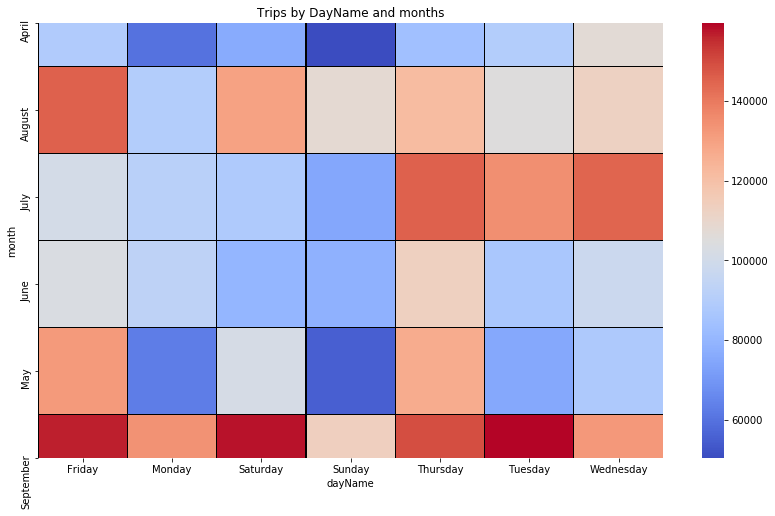

In [246]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.heatmap(month_dayName,linewidths=0.1,linecolor='black',cmap='coolwarm')
plt.title("Trips by DayName and months");

#### We can see most of Cabs are booked on Friday, Thusday and Wednusday.

<Figure size 1008x576 with 0 Axes>

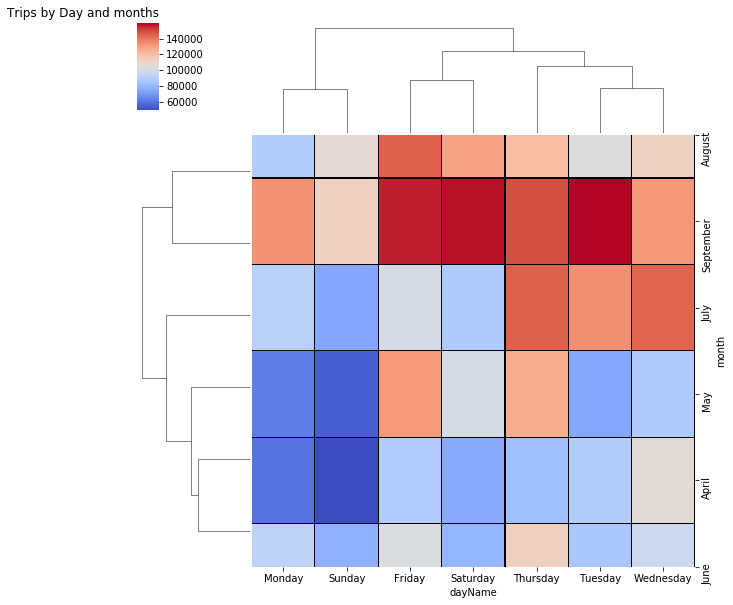

In [248]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.clustermap(month_dayName,linewidths=0.1,linecolor='black',cmap='coolwarm')
plt.title("Trips by Day and months",loc='right');

<Figure size 1008x576 with 0 Axes>

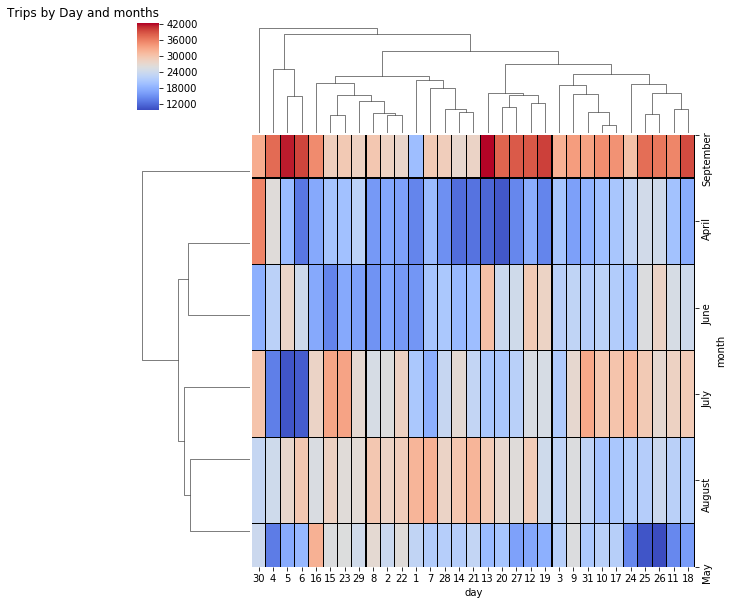

In [250]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.clustermap(day_month,linewidths=0.1,linecolor='black',cmap='coolwarm')
plt.title("Trips by Day and months",loc='right');

In [251]:
#Cross Analysis

def month_quarter_count(row):
    return len(row)

month_quarter = uber_data.groupby(['month','quarter']).apply(month_quarter_count).unstack()
month_quarter

quarter,2,3
month,,
April,556767.0,NaN
August,NaN,813393.0
July,NaN,781969.0
June,653158.0,NaN
May,642360.0,NaN
September,NaN,1004099.0


In [252]:
month_quarter.fillna(0)

quarter,2,3
month,,
April,556767.0,0.0
August,0.0,813393.0
July,0.0,781969.0
June,653158.0,0.0
May,642360.0,0.0
September,0.0,1004099.0


Text(0.5, 1, 'Trips by Quarter and months')

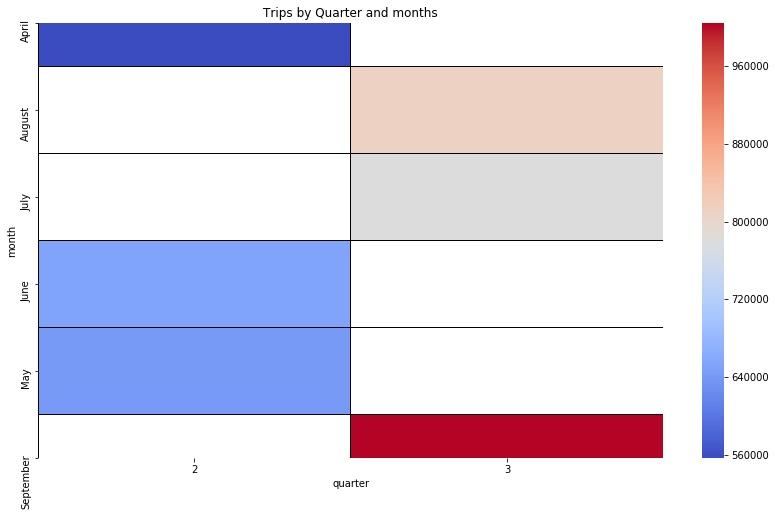

In [253]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.heatmap(month_quarter,linewidths=0.1,linecolor='black',cmap='coolwarm')
plt.title("Trips by Quarter and months")

### We can see Quarter 2 has pretty less rides and Quarter 3 have almost added 50% more count.

In [254]:
#Cross Analysis

def month_week_count(row):
    return len(row)

month_week = uber_data.groupby(['month','week']).apply(month_week_count).unstack()
month_week

week,14,15,16,17,18,19,20,21,22,23,...,31,32,33,34,35,36,37,38,39,40
month,,,,,,,,,,,,,,,,,,,,,
April,110962.0,121736.0,114133.0,136432.0,73504.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82557.0,189922.0,185516.0,182125.0,173273.0,NaN,NaN,NaN,NaN,NaN
July,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,113740.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
June,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15755.0,150257.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
May,NaN,NaN,NaN,NaN,82551.0,147905.0,154342.0,139359.0,118203.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,227972.0,242483.0,243755.0,228818.0,61071.0


In [255]:
month_week.fillna(0)

week,14,15,16,17,18,19,20,21,22,23,...,31,32,33,34,35,36,37,38,39,40
month,,,,,,,,,,,,,,,,,,,,,
April,110962.0,121736.0,114133.0,136432.0,73504.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
August,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,82557.0,189922.0,185516.0,182125.0,173273.0,0.0,0.0,0.0,0.0,0.0
July,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,113740.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
June,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15755.0,150257.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
May,0.0,0.0,0.0,0.0,82551.0,147905.0,154342.0,139359.0,118203.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
September,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,227972.0,242483.0,243755.0,228818.0,61071.0


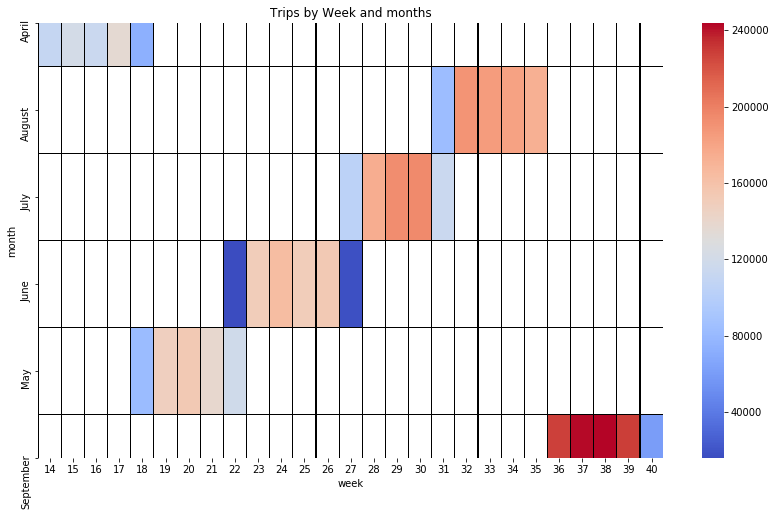

In [257]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.heatmap(month_week,linewidths=0.1,linecolor='black',cmap='coolwarm')
plt.title("Trips by Week and months");

#### We can see weeks appeared in each months and their respective total rides.

In [258]:
#Cross Analysis

def dayName_hour_count(row):
    return len(row)

dayName_hour = uber_data.groupby(['dayName','hour']).apply(dayName_hour_count).unstack()
dayName_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayName,,,,,,,,,,,,,,,,,,,,,
Friday,13447,8002,5232,6788,8641,13168,22988,31522,30926,24803,...,35569,42910,47315,50997,53746,48657,42713,47389,48471,40498
Monday,6327,3679,2885,6106,9460,14737,23285,30650,28764,21854,...,27696,32201,38149,41351,36359,33512,32279,28401,19805,11588
Saturday,27096,18783,12464,9356,6746,6990,8450,10831,14176,17384,...,30851,38104,42735,42013,44995,40271,37922,42938,47107,42388
Sunday,32275,22610,15126,10393,6261,6086,6492,8584,11909,16113,...,27603,30570,32383,30951,27726,25419,24601,23539,19227,11998
Thursday,9116,5169,3629,5532,8355,13889,26561,36393,34856,27376,...,36048,43604,49615,55645,54768,50927,51044,50938,43381,27203
Tuesday,6116,3437,2502,4394,7404,13938,26361,35935,33304,24591,...,34234,40641,47849,54483,49258,43954,43875,39224,27211,14599
Wednesday,7499,4233,3060,4762,7379,13542,26462,35810,33231,25195,...,34512,42606,49764,54584,51732,46096,46875,43754,32222,17803


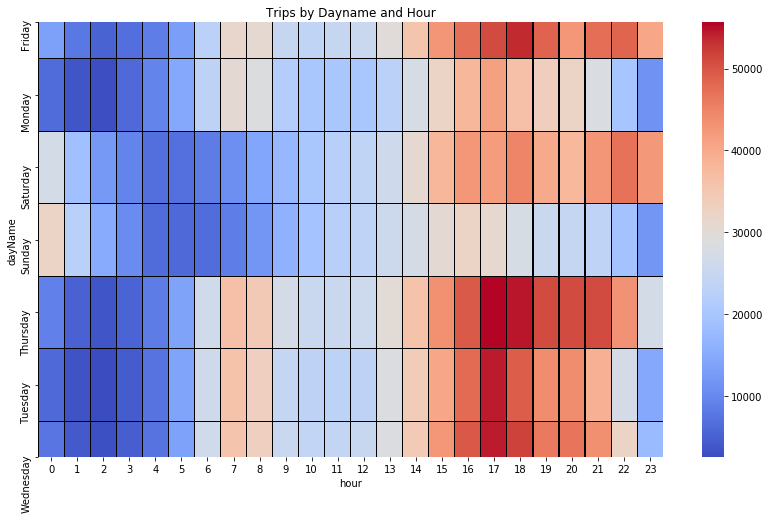

In [260]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.heatmap(dayName_hour,linewidths=0.1,linecolor='black',cmap='coolwarm')
plt.title("Trips by Dayname and Hour");

Text(0.5, 1, 'Trips by Dayname and Hour')

<Figure size 1008x576 with 0 Axes>

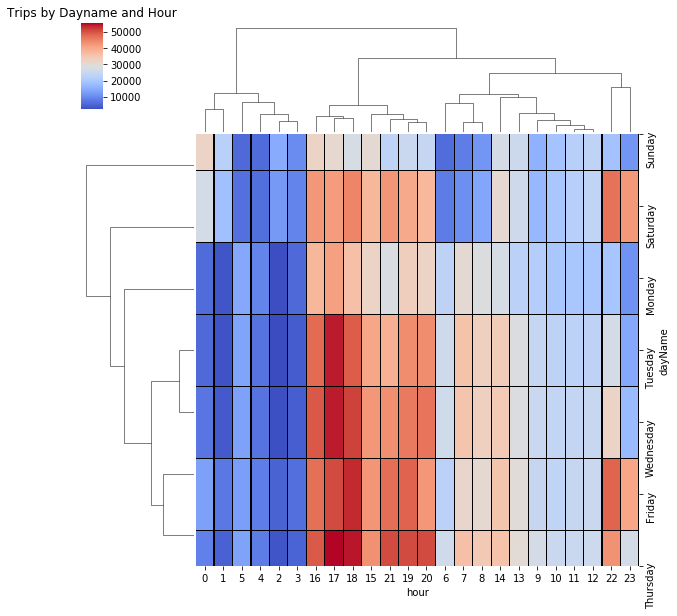

In [85]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.clustermap(dayName_hour,linewidths=0.1,linecolor='black',cmap='coolwarm')
plt.title("Trips by Dayname and Hour")

#### We can see Everyday the time range with maximum amount of rides are pretty same between 3pm - 9pm.

#### Rides are pretty low between 12am-5am, moderate for the rest of the time.

In [261]:
#Cross Analysis

def month_minsCategory_count(row):
    return len(row)

month_minsCategory = uber_data.groupby(['month','minsCategory']).apply(month_minsCategory_count).unstack()
month_minsCategory

minsCategory,0-15 min,15-30 min,30-45 min,45-60 min
month,,,,
April,149592,138883,139477,128815
August,219481,202944,203649,187319
July,211263,195420,194877,180409
June,176462,162883,162738,151075
May,172977,158697,160374,150312
September,271195,251282,250765,230857


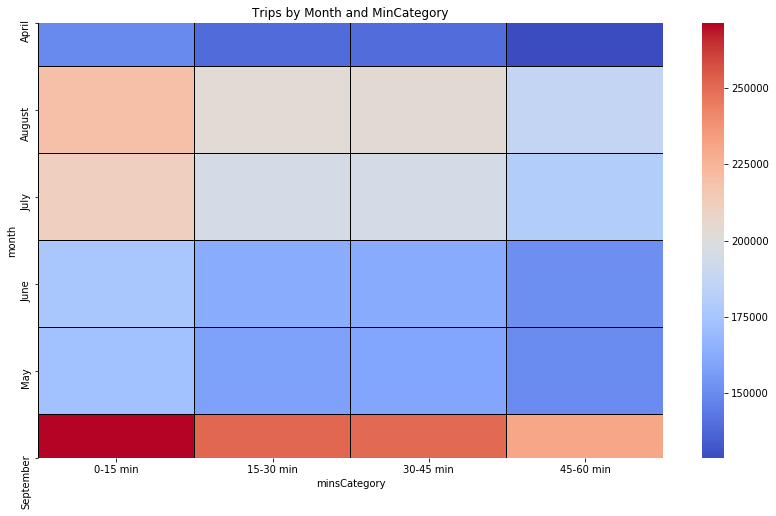

In [263]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.heatmap(month_minsCategory,linewidths=0.1,linecolor='black',cmap='coolwarm')
plt.title("Trips by Month and MinCategory");

<Figure size 1008x576 with 0 Axes>

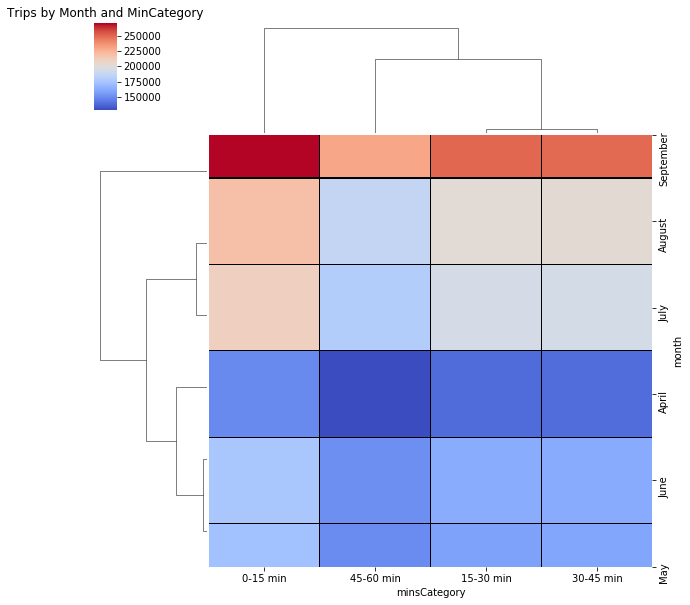

In [264]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.clustermap(month_minsCategory,linewidths=0.1,linecolor='black',cmap='coolwarm')
plt.title("Trips by Month and MinCategory");

#### The clusterMap shows the similar results which we saw in bar and pie chart as between 0-15min maximum number of users booked their cabs.

In [265]:
#Cross Analysis

def Base_DayofWeek_count(row):
    return len(row)

Base_DayofWeek = uber_data.groupby(['Base','dayName']).apply(Base_DayofWeek_count).unstack()
Base_DayofWeek

dayName,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Base,,,,,,,
B02512,32369,24827,26077,20057,34183,30827,32013
B02598,227641,162005,196794,144893,233068,200524,214653
B02617,227924,171784,200880,159904,233277,208026,216188
B02682,199116,141887,168322,125181,202597,174285,187513
B02764,40482,31630,42121,31123,38247,38091,33237


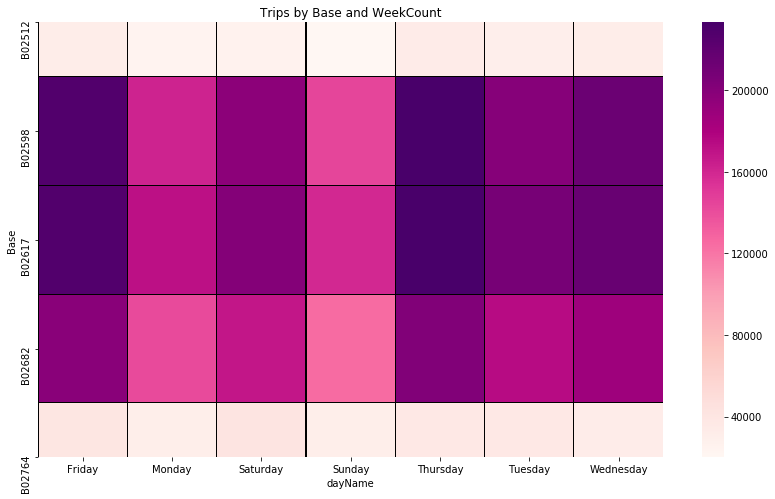

In [266]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.heatmap(Base_DayofWeek,linewidths=0.1,linecolor='black',cmap='RdPu')
plt.title("Trips by Base and WeekCount");

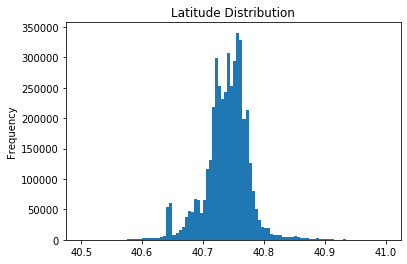

In [267]:
# Analysis by Latitude and Longitude
#Lat
uber_data['Lat'].plot(kind='hist',bins=100,range=(40.5,41));
plt.title("Latitude Distribution");

#### The graph shows the lattitude points from where the users have booked their cabs.

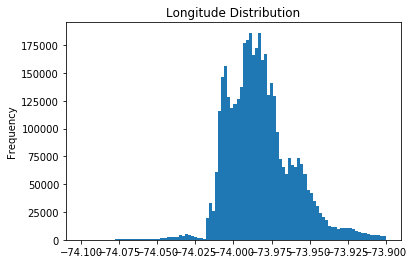

In [268]:
#Lon
uber_data['Lon'].plot(kind='hist',bins=100,range=(-74.1,-73.9));
plt.title("Longitude Distribution");

#### The graph shows the longitude points from where the users have booked their cabs.

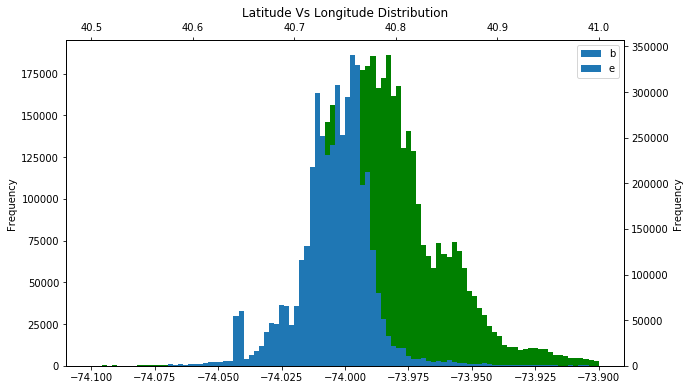

In [269]:
plt.figure(figsize=(10,6))
plt.tight_layout()
uber_data['Lon'].plot(kind='hist',bins=100,range=(-74.1,-73.9),label='longitude',color='green')
plt.twiny()
plt.twinx()
uber_data['Lat'].plot(kind='hist',bins=100,range=(40.5,41),label='latitude')
plt.legend('best')
plt.title("Latitude Vs Longitude Distribution");

#### This is the combined graph showing complete Lattitude and Longitude.

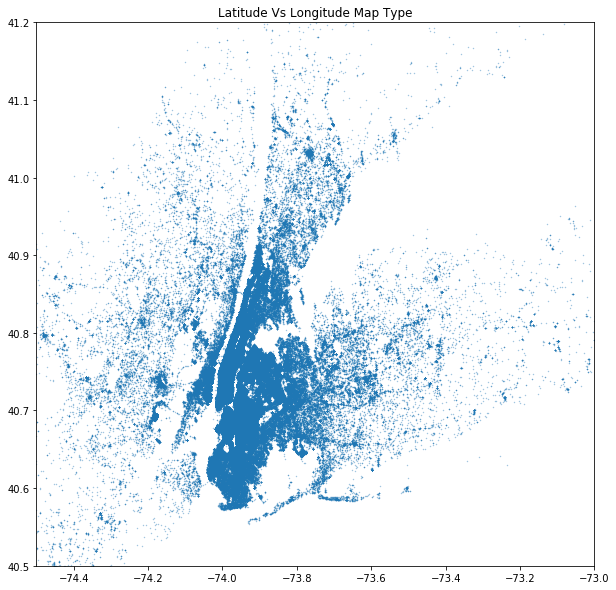

In [270]:
plt.figure(figsize=(10,10))
plt.plot(uber_data['Lon'],uber_data['Lat'],'.',ms=.8,alpha=.5)
plt.xlim(-74.5,-73)
plt.ylim(40.5,41.2)
plt.title("Latitude Vs Longitude Map Type");

#### This shows the Map of US wrt lattitude and longitude points where cabs are booked by users.

In [271]:
import collections

In [272]:
hours_counter = collections.Counter(uber_data['hour'])
hours_counter

Counter({0: 101876,
         1: 65913,
         2: 44898,
         3: 47331,
         4: 54246,
         5: 82350,
         6: 140599,
         7: 189725,
         8: 187166,
         9: 157316,
         10: 156455,
         11: 162687,
         12: 167361,
         13: 192427,
         14: 226513,
         15: 270636,
         16: 307810,
         17: 330024,
         18: 318584,
         19: 288836,
         20: 279309,
         21: 276183,
         22: 237424,
         23: 166077})

In [273]:
# Top 5 most common time pickup
hours_counter.most_common(5)

[(17, 330024), (18, 318584), (16, 307810), (19, 288836), (20, 279309)]

#### These are the Top 5 most common pickup time. 

#### 5pm is the most common pickup Time with 330024 rides.

In [274]:
datetime_counter = collections.Counter(uber_data['Date/Time'])

In [275]:
# Top 10 most common Date-time pickup
datetime_counter.most_common(10)

[(Timestamp('2014-04-07 20:21:00'), 97),
 (Timestamp('2014-06-13 18:03:00'), 85),
 (Timestamp('2014-04-07 20:22:00'), 83),
 (Timestamp('2014-09-13 18:44:00'), 78),
 (Timestamp('2014-07-15 19:25:00'), 77),
 (Timestamp('2014-07-15 19:30:00'), 77),
 (Timestamp('2014-09-13 18:41:00'), 77),
 (Timestamp('2014-04-30 17:45:00'), 76),
 (Timestamp('2014-05-16 19:58:00'), 75),
 (Timestamp('2014-05-16 21:29:00'), 75)]

#### These are the Top 10 most common Date-time pickup.

#### 2014-04-07  8:21pm is the most common pickup date-time with 97 rides.

In [278]:
date_counter = collections.Counter(uber_data['date'])

In [279]:
# Top 10 most common Date pickup
date_counter.most_common(10)

[(datetime.date(2014, 9, 13), 42169),
 (datetime.date(2014, 9, 5), 41457),
 (datetime.date(2014, 9, 19), 40007),
 (datetime.date(2014, 9, 6), 39695),
 (datetime.date(2014, 9, 18), 39310),
 (datetime.date(2014, 9, 12), 38607),
 (datetime.date(2014, 9, 27), 38424),
 (datetime.date(2014, 9, 20), 37793),
 (datetime.date(2014, 9, 4), 37507),
 (datetime.date(2014, 9, 25), 37218)]

#### These are the Top 10 most common Date pickup.

#### 2014-09-13 is the most common date with 42169 rides.

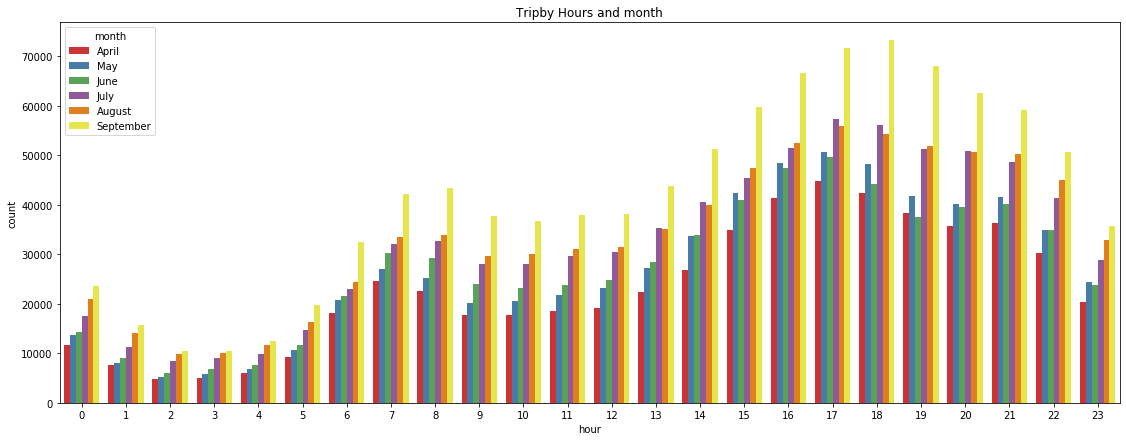

In [281]:
#Trips by Hours and Months
plt.figure(figsize=(19,7))
plt.xlabel('hours')
plt.ylabel('total')
plt.title('Tripby Hours and month')
sns.countplot(data=uber_data,x='hour',hue='month',palette="Set1");

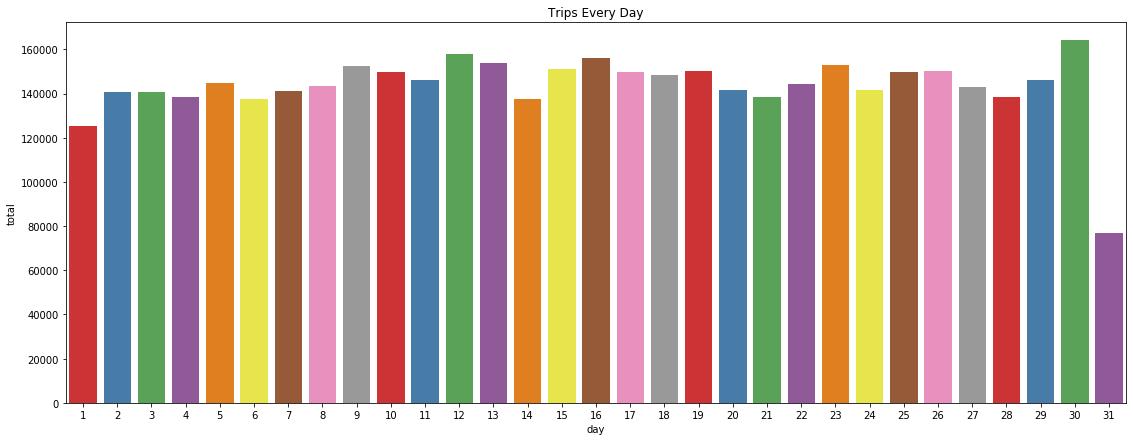

In [282]:
#trips during every day of the month
plt.figure(figsize=(19,7))
sns.countplot(data=uber_data,x='day',palette="Set1")
plt.xlabel('day')
plt.ylabel('total')
plt.title('Trips Every Day');

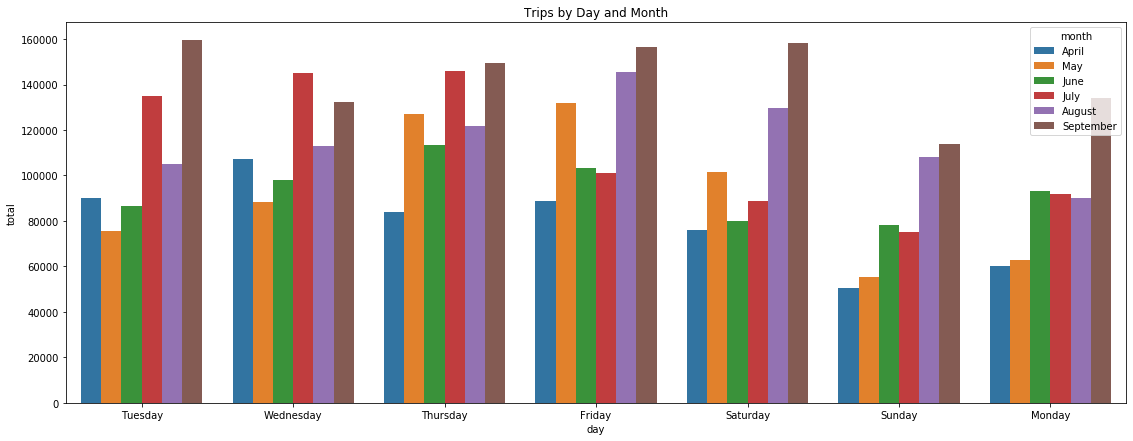

In [283]:
#Trips by Day and Month
plt.figure(figsize=(19,7))
sns.countplot(data=uber_data,x='dayName',hue='month')
plt.xlabel('day')
plt.ylabel('total')
plt.title('Trips by Day and Month');

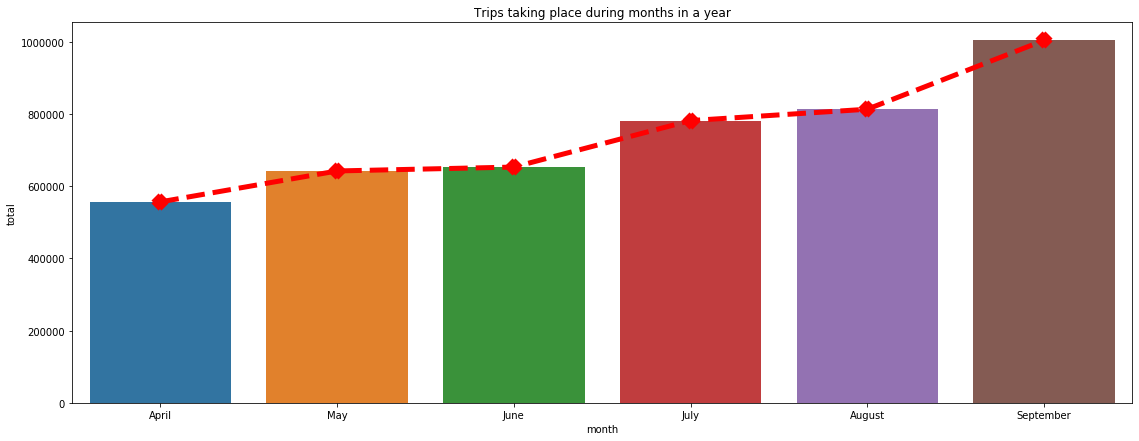

In [284]:
#Number of Trips taking place during months in a year
plt.figure(figsize=(19,7))
uber_data['month'].value_counts().sort_values(ascending=True).plot(color='red',linewidth=5,marker='x',ls='--',markersize=10,markeredgewidth=10)
sns.countplot(data=uber_data,x='month')
plt.xlabel('month')
plt.ylabel('total')
plt.title('Trips taking place during months in a year');

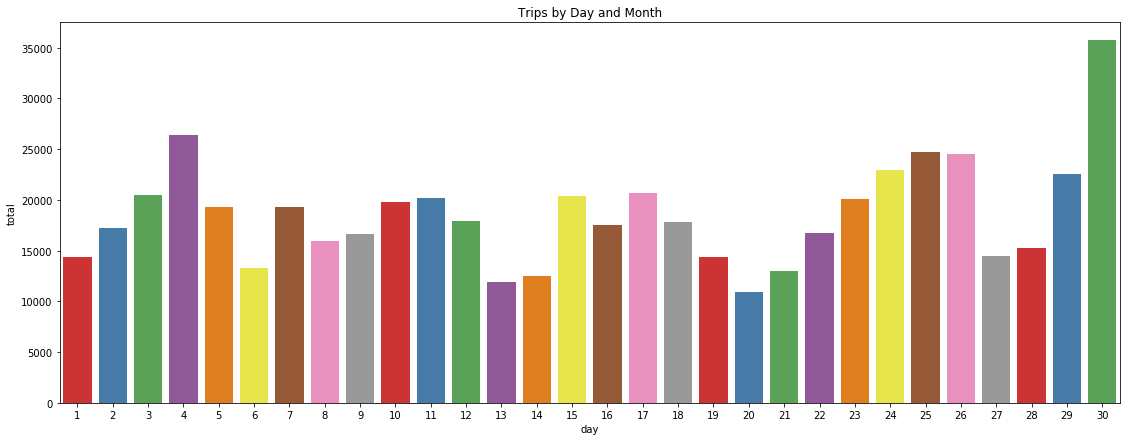

In [285]:
#Trips by Day and Month
plt.figure(figsize=(19,7))
sns.countplot(data=uber_data[uber_data['month']=='April'],x='day',palette='Set1')
plt.xlabel('day')
plt.ylabel('total')
plt.title('Trips by Day and Month');

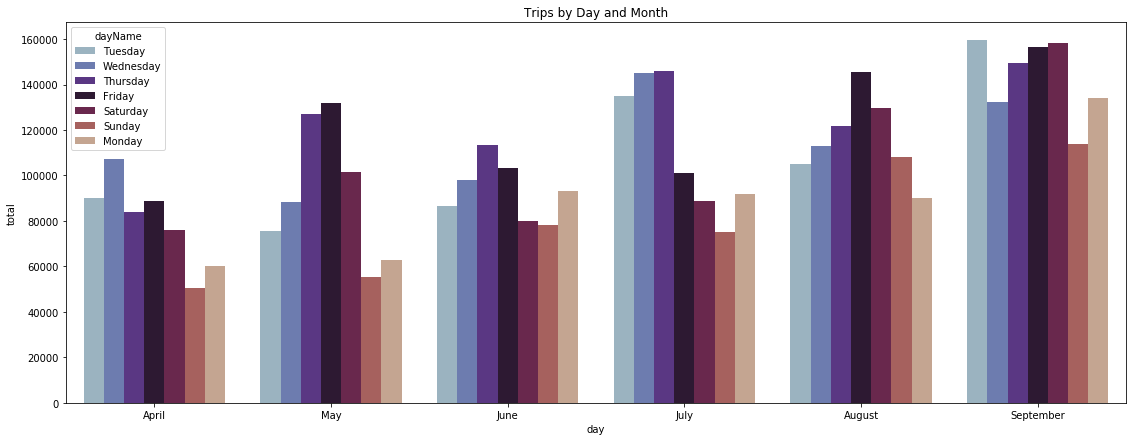

In [299]:
#Trips by Day and Month
plt.figure(figsize=(19,7))
sns.countplot(data=uber_data,x='month',hue='dayName',palette='twilight')
plt.xlabel('day')
plt.ylabel('total')
plt.title('Trips by Day and Month');

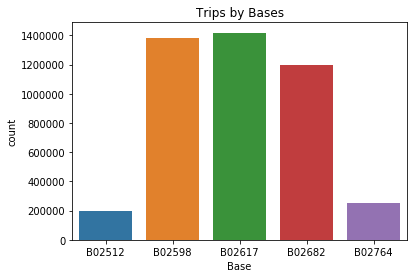

In [287]:
#Finding out the number of Trips by bases
sns.countplot(data=uber_data,x='Base')
plt.title('Trips by Bases');

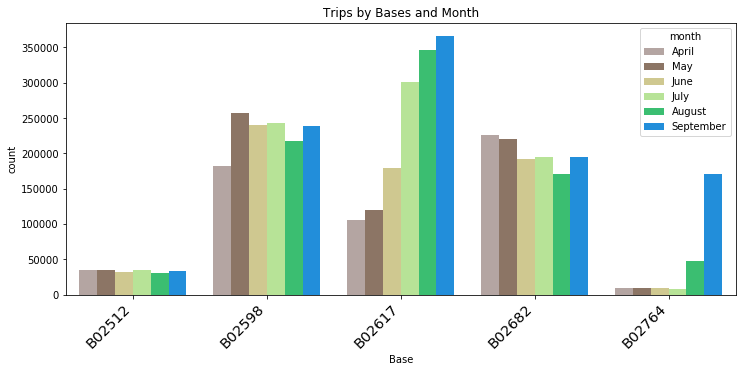

In [298]:
#Finding out the number of Trips by bases adn months
plt.figure(figsize=(12,5))
chart = sns.countplot(data=uber_data,x='Base',hue='month',palette='terrain_r')
plt.title('Trips by Bases and Month')
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large');

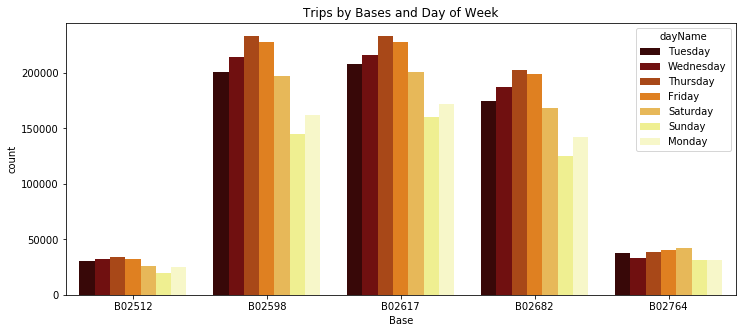

In [304]:
#Finding out the number of Trips by bases and DayofWeek
plt.figure(figsize=(12,5))
sns.countplot(data=uber_data,x='Base',hue='dayName',palette='afmhot')
plt.title('Trips by Bases and Day of Week');

In [305]:
uber_data2=uber_data.set_index('date')
uber_data2.head()

,Date/Time,Lat,Lon,Base,day,month,dayName,quarter,week,hour,minute,minsCategory
date,,,,,,,,,,,,
2014-04-01,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,April,Tuesday,2,14,0,11,0-15 min
2014-04-01,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,April,Tuesday,2,14,0,17,15-30 min
2014-04-01,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,April,Tuesday,2,14,0,21,15-30 min
2014-04-01,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,April,Tuesday,2,14,0,28,15-30 min
2014-04-01,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,April,Tuesday,2,14,0,33,30-45 min


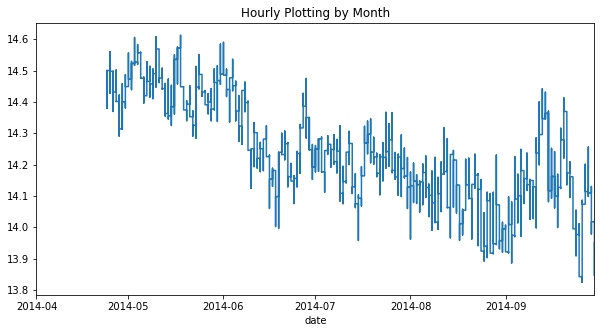

In [306]:
#plotting time series graph
plt.figure(figsize=(20,6))
uber_data2.sort_index(inplace=True)

uber_data2['hour'].rolling(400000).mean().plot(figsize=(10,5))
plt.title("Hourly Plotting by Month");

In [307]:
uber_data.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'day', 'month', 'dayName', 'quarter',
       'week', 'hour', 'minute', 'date', 'minsCategory'],
      dtype='object')

Text(0.5, 1, 'Trip Count by Weeks wrt minsCategory')

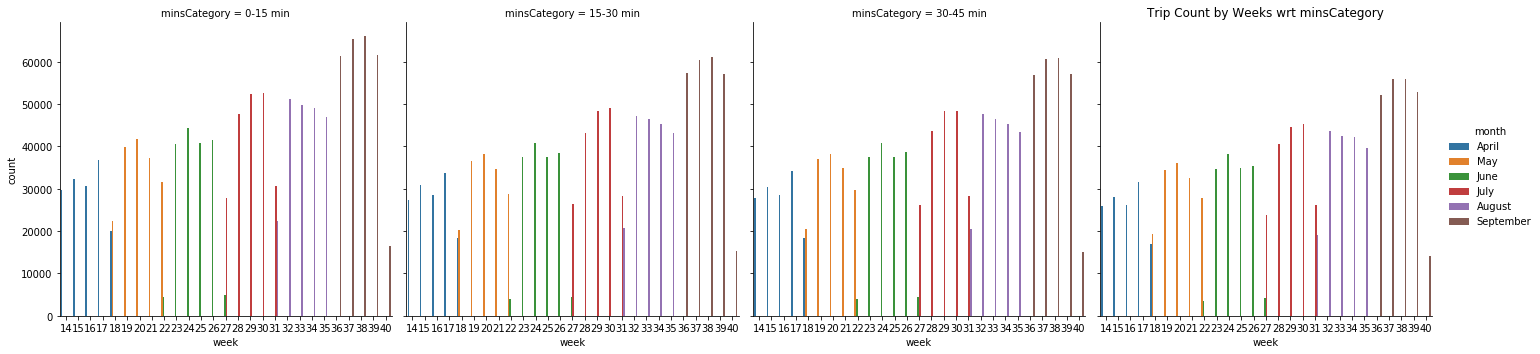

In [115]:
sns.catplot(data=uber_data,x='week',hue='month',col='minsCategory',kind="count");
plt.title("Trip Count by Weeks wrt minsCategory");

In [116]:
#Get the last business day of each month
#apple_month = apple.resample('BM').mean()
#apple_month.head()

## Some Time Series Analysis

In [308]:
# Re-Sampling in time series

uber_data3 = uber_data.set_index('Date/Time').copy()

In [309]:
uber_data3.head()

,Lat,Lon,Base,day,month,dayName,quarter,week,hour,minute,date,minsCategory
Date/Time,,,,,,,,,,,,
2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,April,Tuesday,2,14,0,11,2014-04-01,0-15 min
2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,April,Tuesday,2,14,0,17,2014-04-01,15-30 min
2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,April,Tuesday,2,14,0,21,2014-04-01,15-30 min
2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,April,Tuesday,2,14,0,28,2014-04-01,15-30 min
2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,April,Tuesday,2,14,0,33,2014-04-01,30-45 min


In [310]:
## Business Day Wise Frequency
business_days = uber_data3.resample('B').sum().astype(int)
business_days.head()

,Lat,Lon,day,quarter,week,hour,minute
Date/Time,,,,,,,
2014-04-01,585688,-1063486,14376,28752,201264,200675,425250
2014-04-02,701983,-1274637,34460,34460,241220,242707,509189
2014-04-03,834470,-1515243,61446,40964,286748,311761,602292
2014-04-04,2398401,-4355326,281265,117748,824236,854949,1739786
2014-04-07,787089,-1429152,135233,38638,289785,283970,577104


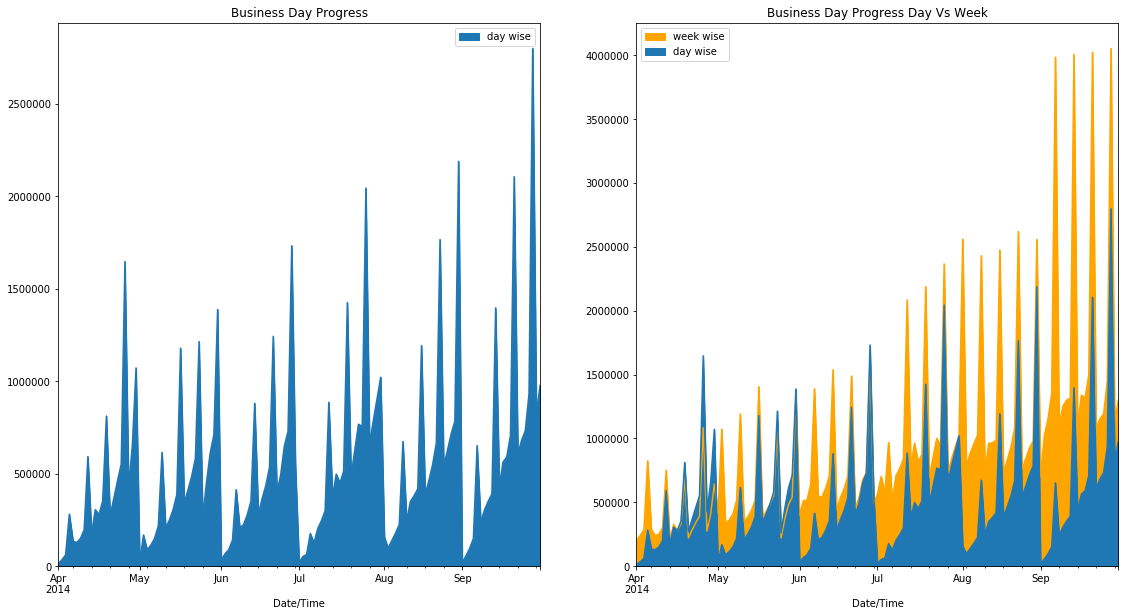

In [311]:
plt.figure(figsize=(19,10))
plt.subplot(121)
uber_data3['day'].resample('B').sum().plot(kind='area',label='day wise')
plt.legend()
plt.title("Business Day Progress")

plt.subplot(122)
uber_data3['week'].resample('B').sum().plot(kind='area',label='week wise',color='orange')
uber_data3['day'].resample('B').sum().plot(kind='area',label='day wise')
plt.legend()
plt.title("Business Day Progress Day Vs Week");

#### We can see the day wise monthly graph which has grown quite a lot.

#### We can also see the Week wise Vs Day wise graph. 

#### There are some days in everymonth which has almost same or more count as week count.

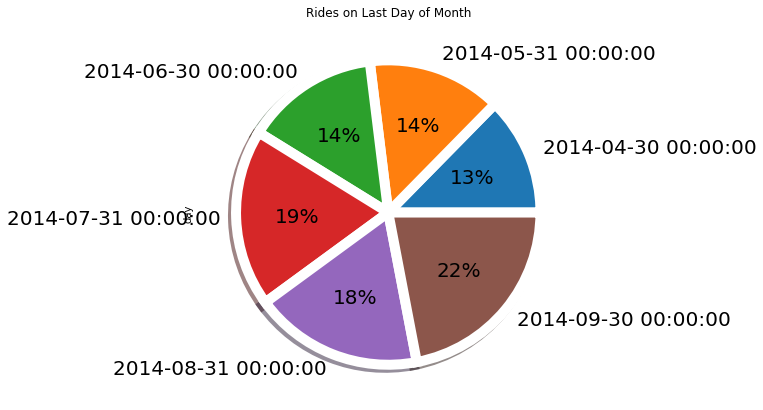

In [312]:
# Seeing the by month

#Rides on last day months 
plt.figure(figsize=(16,7))

uber_data3['day'].resample('M').sum().plot.pie(autopct='%1.f%%',
                                                             wedgeprops={'linewidth':10,'edgecolor':'white'},
                                                             shadow=True,
                                                             fontsize=20)
plt.title("Rides on Last Day of Month");

#### We can see last day of every month rides count and 30th of Sept has the highest % of rides.

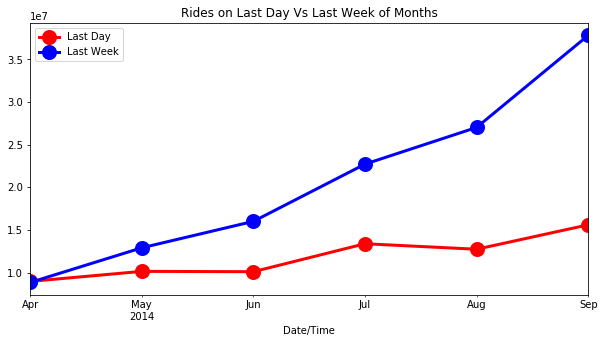

In [313]:
plt.figure(figsize=(10,5))
plt.title("Rides on Last Day Vs Last Week of Months")

uber_data3['day'].resample('M').sum().plot(marker='o',markersize=10,linewidth=3,color='red',markeredgewidth=5,label='Last Day')
uber_data3['week'].resample('M').sum().plot(marker='o',markersize=10,linewidth=3,color='blue',markeredgewidth=5,label='Last Week')
plt.legend();

#### We can see Last Day vs Last Week count , we can see how much the rides have grown exponentially week wise.

#### Day wise it saw a slight downfall in August but overall its increasing.

In [314]:
uber_data3.resample('M').sum().astype(int)

,Lat,Lon,day,quarter,week,hour,minute
Date/Time,,,,,,,
2014-04-30,22682672,-41187840,8969101,1113534,8848052,8054267,16398593
2014-05-31,26169764,-47518579,10147383,1284720,12909958,9301367,18944863
2014-06-30,26609573,-48316757,10107001,1306316,16007452,9235980,19194797
2014-07-31,31856744,-57844116,13385157,2345907,22716875,11119299,22970052
2014-08-31,33135806,-60166851,12739141,2440179,27015604,11431883,23896572
2014-09-30,40906177,-74275057,15602174,3012297,37808295,14150079,29480943


In [315]:
# Weekly Frequency

uber_data3.resample('W').sum().astype(int).head()

,Lat,Lon,day,quarter,week,hour,minute
Date/Time,,,,,,,
2014-04-06,4520544,-8208694,391547,221924,1553468,1610092,3276517
2014-04-13,4959524,-9005629,1202601,243472,1826040,1746123,3588689
2014-04-20,4649693,-8443175,1923736,228266,1826128,1654377,3358158
2014-04-27,5558162,-10092695,3299153,272864,2319344,1972218,4016860
2014-05-04,6357729,-11544294,2343466,312110,2808990,2277106,4587839


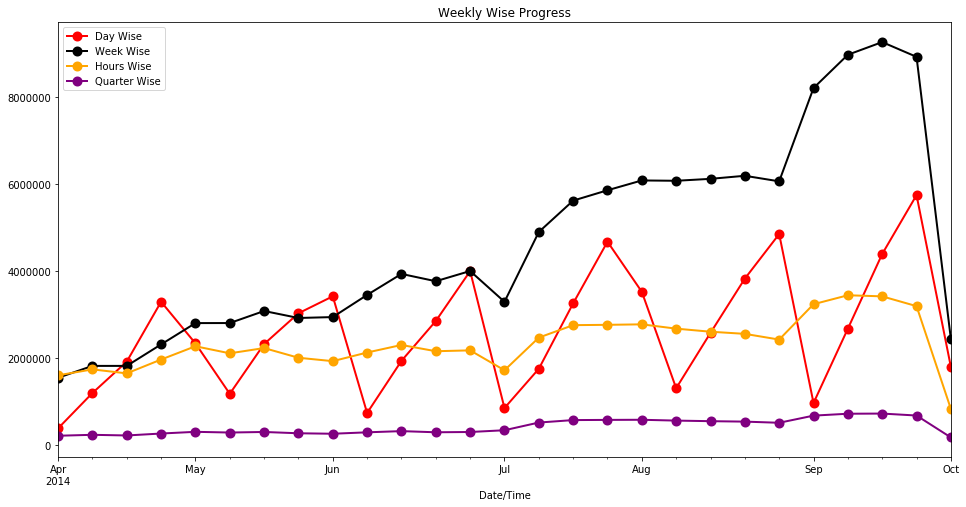

In [316]:
plt.figure(figsize=(16,8))
plt.title('Weekly Wise Progress')
uber_data3['day'].resample('W').sum().plot(marker='o',markersize=5,linewidth=2,color='red',markeredgewidth=5,label='Day Wise')
uber_data3['week'].resample('W').sum().plot(marker='o',markersize=5,linewidth=2,color='black',markeredgewidth=5,label='Week Wise')
uber_data3['hour'].resample('W').sum().plot(marker='o',markersize=5,linewidth=2,color='orange',markeredgewidth=5,label='Hours Wise')
uber_data3['quarter'].resample('W').sum().plot(marker='o',markersize=5,linewidth=2,color='purple',markeredgewidth=5,label='Quarter Wise')
plt.legend();

#### The graph shows exact picture of the overall week wise rides,  Day wise, Week wise, Hours wise amd Quarter wise.

In [324]:
## Hours Frequency
uber_data3.resample('H').sum().astype(int).head()

,Lat,Lon,day,quarter,week,hour,minute
Date/Time,,,,,,,
2014-04-01 00:00:00,5417,-9838,133,266,1862,0,3882
2014-04-01 01:00:00,2525,-4586,62,124,868,62,1679
2014-04-01 02:00:00,2078,-3772,51,102,714,102,1462
2014-04-01 03:00:00,3666,-6657,90,180,1260,270,3127
2014-04-01 04:00:00,6556,-11908,161,322,2254,644,5070


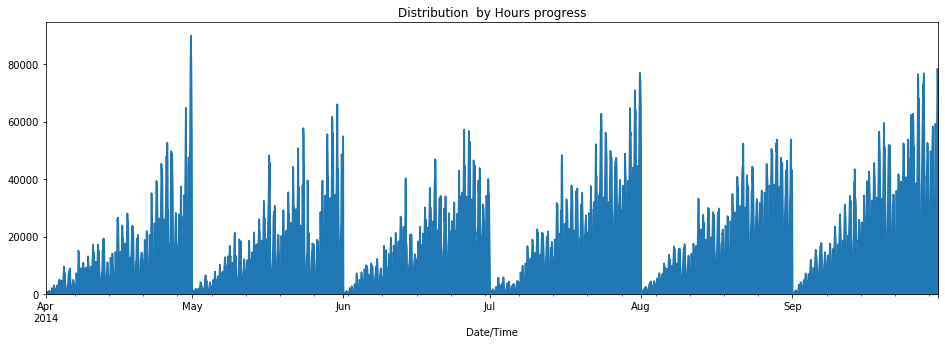

In [325]:
plt.figure(figsize=(16,5))
uber_data3['day'].resample('H').sum().plot.area()
plt.title("Distribution  by Hours progress");

#### The distribution is Hourly rides of Each month. It has a steep high each month as it the time between 3pm when the rides increases a lot.

In [317]:
## Quartely Frequency
uber_data3.resample('Q').sum().astype(int).head()

,Lat,Lon,day,quarter,week,hour,minute
Date/Time,,,,,,,
2014-06-30,75462011,-137023177,29223485,3704570,37765462,26591614,54538253
2014-09-30,105898728,-192286026,41726472,7798383,87540774,36701261,76347567


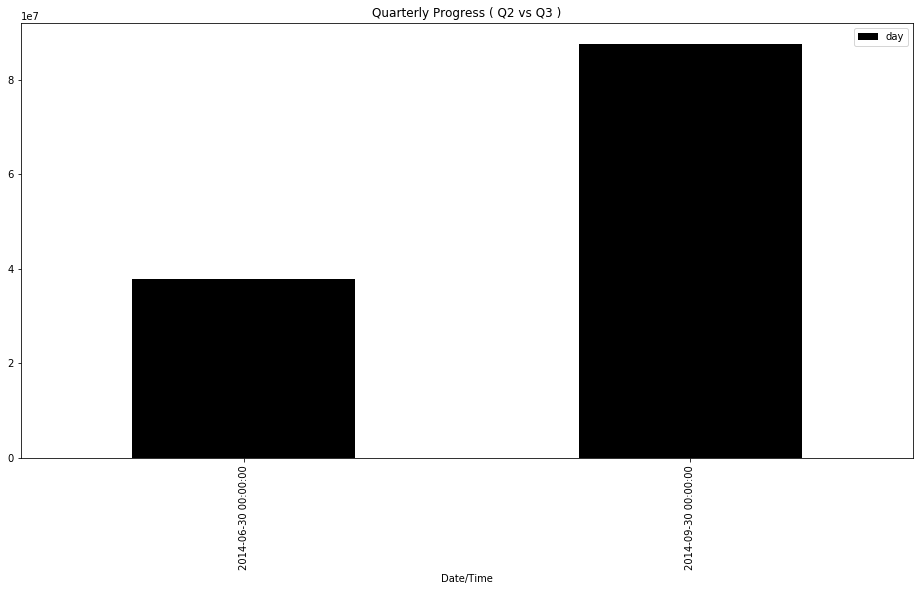

In [318]:
plt.figure(figsize=(16,8))
plt.title('Quarterly Progress ( Q2 vs Q3 )')
uber_data3['week'].resample('Q').sum().plot(kind='bar',label='day',color='black')
plt.legend();

#### Quarter 2 has less rides and Quarter 3 has almost 50% most rides than previous quarter.

In [323]:
## Month Starting Frequency
uber_data3.resample('MS').sum().astype(int).head()

,Lat,Lon,day,quarter,week,hour,minute
Date/Time,,,,,,,
2014-04-01,22682672,-41187840,8969101,1113534,8848052,8054267,16398593
2014-05-01,26169764,-47518579,10147383,1284720,12909958,9301367,18944863
2014-06-01,26609573,-48316757,10107001,1306316,16007452,9235980,19194797
2014-07-01,31856744,-57844116,13385157,2345907,22716875,11119299,22970052
2014-08-01,33135806,-60166851,12739141,2440179,27015604,11431883,23896572


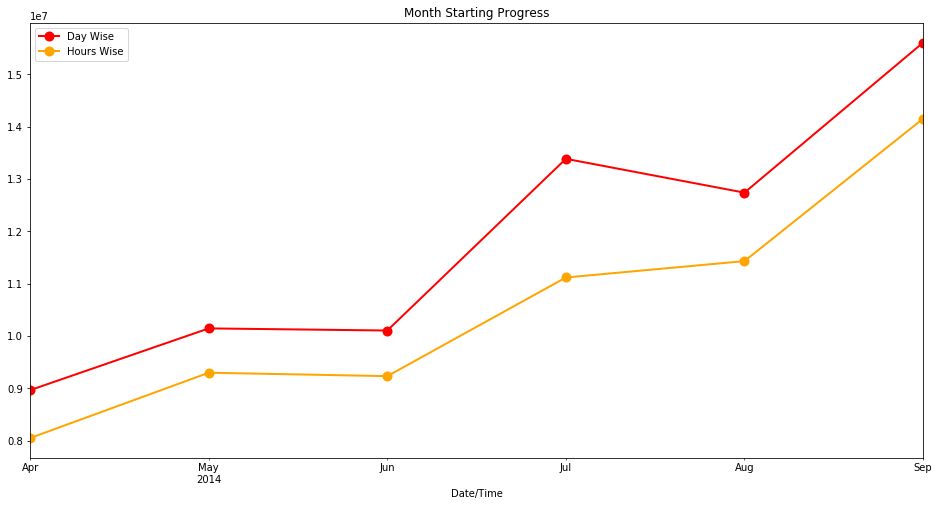

In [322]:
plt.figure(figsize=(16,8))
plt.title('Month Starting Progress')
uber_data3['day'].resample('MS').sum().plot(marker='o',markersize=5,linewidth=2,color='red',markeredgewidth=5,label='Day Wise')
uber_data3['hour'].resample('MS').sum().plot(marker='o',markersize=5,linewidth=2,color='orange',markeredgewidth=5,label='Hours Wise')
plt.legend();

#### The graph shows Each month's 1st day ride compared to Hours , we can see both have increased a lot parallely.

### Applying Shifting

In [326]:
business_days['previous_day_user'] = business_days['day'].tshift(1)

business_days['per_day_users_increase'] = business_days['day'] - business_days['previous_day_user']

In [327]:
## calculating % inc of 5 days

business_days['5day%_Increase_Users'] = business_days['day'] - business_days['day'].shift(5)

In [328]:
business_days['5day%_Increase_Users'] = round(business_days['5day%_Increase_Users']*100/business_days['day'])

In [329]:
# adding % at end of 5 day results
business_days = business_days.fillna(0)
business_days['5day%_Increase_Users'] = business_days['5day%_Increase_Users'].apply(lambda x: str(x) + '%')

In [330]:
business_days.head(10)

,Lat,Lon,day,quarter,week,hour,minute,previous_day_user,per_day_users_increase,5day%_Increase_Users
Date/Time,,,,,,,,,,
2014-04-01,585688,-1063486,14376,28752,201264,200675,425250,0.0,0.0,0.0%
2014-04-02,701983,-1274637,34460,34460,241220,242707,509189,14376.0,20084.0,0.0%
2014-04-03,834470,-1515243,61446,40964,286748,311761,602292,34460.0,26986.0,0.0%
2014-04-04,2398401,-4355326,281265,117748,824236,854949,1739786,61446.0,219819.0,0.0%
2014-04-07,787089,-1429152,135233,38638,289785,283970,577104,281265.0,-146032.0,0.0%
2014-04-08,651710,-1183334,127968,31992,239940,220019,469085,135233.0,-7265.0,89.0%
2014-04-09,677585,-1230310,149679,33262,249465,234844,485098,127968.0,21711.0,77.0%
2014-04-10,806074,-1463623,197850,39570,296775,291283,583003,149679.0,48171.0,69.0%
2014-04-11,2037064,-3699210,591871,100010,750075,716007,1474399,197850.0,394021.0,52.0%


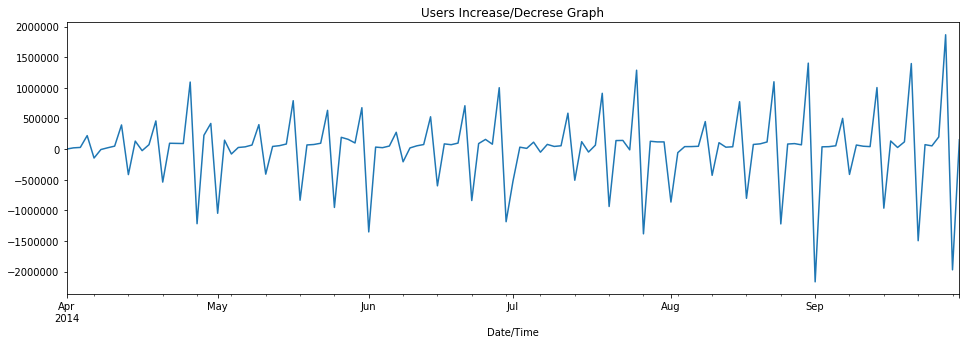

In [331]:
plt.figure(figsize=(16,5))
business_days['per_day_users_increase'].plot()
plt.title('Users Increase/Decrese Graph');

#### We can see how fastly the users have increased From Apr to Sept. (64000) approx which we saw earlier.

#### This shows how good service Uber Provides to its Customer.

In [332]:
uber_data2.head()

,Date/Time,Lat,Lon,Base,day,month,dayName,quarter,week,hour,minute,minsCategory
date,,,,,,,,,,,,
2014-04-01,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,April,Tuesday,2,14,0,11,0-15 min
2014-04-01,2014-04-01 21:54:00,40.7650,-73.9888,B02682,1,April,Tuesday,2,14,21,54,45-60 min
2014-04-01,2014-04-01 21:54:00,40.7524,-74.0063,B02682,1,April,Tuesday,2,14,21,54,45-60 min
2014-04-01,2014-04-01 21:54:00,40.6760,-73.9752,B02682,1,April,Tuesday,2,14,21,54,45-60 min
2014-04-01,2014-04-01 21:54:00,40.7112,-74.0084,B02682,1,April,Tuesday,2,14,21,54,45-60 min


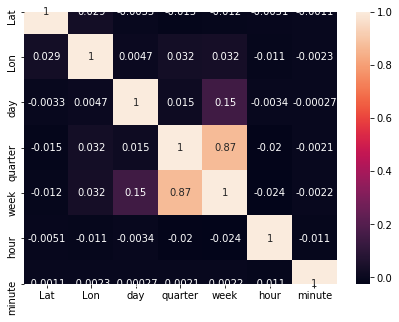

In [333]:
plt.figure(figsize=(7,5))
sns.heatmap(uber_data2.corr(),annot=True);

In [336]:
# Final shape
uber_data.shape

(4451746, 13)